<center><h1>Jaini Bhavsar</h1></center><hr>

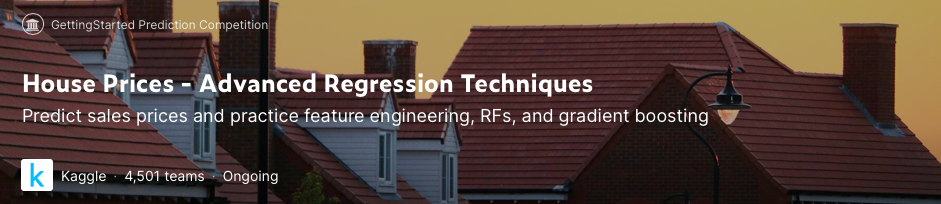

<center><h1>House Prices - Advanced Regression Techniques</h1></center><hr>

<hr>

Features created for the project
* Lot Width
* Minor Side (helper feature)
* Major Side (helper feature)
* Lot Proportions
* Age
* Garage Score
* Overall Score
* Beds to Baths Ratio
* Rooms to Baths Ratio
* Rooms to Beds Ratio

<hr>

Features chosen through feature importance method (along with feature importance value) <br>

{'Garage_Score': 0.35265822447545775, <br>
 'GrLivArea': 0.17161135713401046, <br>
 'OverallScore': 0.13797886158471717, <br>
 'Age of House': 0.07502029691075009, <br>
 'TotalBsmtSF': 0.051508471425298255, <br>
 'BsmtFinSF1': 0.04222404478427029, <br>
 '2ndFlrSF': 0.03191375390756614, <br>
 '1stFlrSF': 0.022528735434327766, <br>
 'TotRmsAbvGrd': 0.017062131538012122, <br>
 'Bnk': 0.013850676370452272} 

ML models for Project
* Linear Regression
* Support Vector Regressor
* Decision Tree Regresssor

Different hyperparameters were used in different iterations along with different data like normalized, standard scaled, different feature set from previous iteration, etc, for scores improvement

<h2>Data Fetching</h2>
<hr>

<code>Data fetching involves extraction of data from train.csv file which comprises of 81 columns. Sale Price is the output column and all other columns are input columns.</code>

<code>This step involves reading the csv file through pandas 'read_csv' file.</code>

In [1]:
import pandas as pd
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<code>Above is the glance of training data set.</code>

In [2]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<code>Above is the glance of testing data set</code>

In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<code>We can observe from above dataframe that the training dataframe contains Nan values. See 1452 < 1460 for no. of rows(MasVnrArea) < YearRemodAdd</code>

In [4]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<code>Similar observation can be traced out for test dataframe.</code>

<h2> Data Preprocessing </h2>
* Data quality checking, missing data imputation [Goal]
<hr>

<code>Data Preprocessing involves transformation of data to refined format so that it becomes appropriate to train the model.</code>

<code><i>Note:&nbsp;</i>Data Preprocessing and feature selection will go hand-in-hand for this project since the training/testing data have 81 columns which needs to be checked for data type and missing/NaN values,  and we are supposed to create new features as well.</code>

In [5]:
y = train_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [6]:
train_df = train_df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

<h3>Drop 'Id' Column</h3>

<code>We drop the feature 'Id' as it has no impact on model and 'Id' in the data is just like index to the property with not much significance in training and testing.</code>

In [7]:
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis =1)

In [8]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<code>We can observe from the above dataframe glimpses that 'Id' column stands dropped in training and testing data.</code>

In [10]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [11]:
test_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<code>We can observe from below that the data points corresponding to various columns in training and testing data consists of null values. This requires us to do data cleaning either by filling missing values or dropping the rows with NaN values.</code>

<code>Dropping of rows will lead to loss of information corresponding to data points for some other columns for which we have non-NaN values. Instead of dropping rows with NaN values, we will fill the missing data by some value resulting from statistical function like mean, median or mode.</code>

In [12]:
for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, train_df[column].isnull().sum()))

LotFrontage has 259 null values
Alley has 1369 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinType2 has 38 null values
Electrical has 1 null values
FireplaceQu has 690 null values
GarageType has 81 null values
GarageYrBlt has 81 null values
GarageFinish has 81 null values
GarageQual has 81 null values
GarageCond has 81 null values
PoolQC has 1453 null values
Fence has 1179 null values
MiscFeature has 1406 null values


In [13]:
for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, test_df[column].isnull().sum()))

MSZoning has 4 null values
LotFrontage has 227 null values
Alley has 1352 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
PoolQC has 1456 null values
Fence has 1169 null values
MiscFeature has 1408 null values
SaleType has 1 null values


<code>We first find data type of column to fill missing values. If the data type is numeric (int or float) we will fill the missing data with mean and if it is string/object we will fill it the recurring/frequent value in that column.</code>

In [14]:
import numpy as np
numeric_columns_in_train = train_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns_in_train

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [15]:
for column in numeric_columns_in_train:
    train_df[column] = train_df[column].fillna(train_df[column].mean())

In [16]:
total_set = set(train_df.columns)
numeric_set = set(numeric_columns_in_train)

In [17]:
total_set - numeric_set

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [18]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [19]:
object_columns_in_train = list(total_set)
object_columns_in_train

['GrLivArea',
 'MSSubClass',
 'GarageCond',
 'Fence',
 'HeatingQC',
 'Functional',
 'MSZoning',
 '2ndFlrSF',
 'LotConfig',
 'Condition1',
 'GarageCars',
 'BedroomAbvGr',
 'MiscVal',
 'LotFrontage',
 'BsmtUnfSF',
 'BsmtHalfBath',
 '1stFlrSF',
 'LotArea',
 'EnclosedPorch',
 'BsmtFinSF1',
 'MasVnrType',
 'BsmtFullBath',
 'PoolQC',
 'Neighborhood',
 'KitchenQual',
 'LandContour',
 'Foundation',
 'BsmtQual',
 'CentralAir',
 'LowQualFinSF',
 '3SsnPorch',
 'MiscFeature',
 'Utilities',
 'YrSold',
 'ExterCond',
 'ExterQual',
 'BsmtFinType2',
 'FullBath',
 'RoofMatl',
 'LotShape',
 'BsmtCond',
 'OverallCond',
 'GarageFinish',
 'HouseStyle',
 'RoofStyle',
 'SaleType',
 'GarageYrBlt',
 'Alley',
 'MasVnrArea',
 'KitchenAbvGr',
 'FireplaceQu',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolArea',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'BldgType',
 'ScreenPorch',
 'LandSlope',
 'Condition2',
 'OverallQual',
 'YearRemodAdd',
 'Exterior1st',
 'GarageType',
 'PavedDrive',
 'MoSold',
 'Hea

In [20]:
for column in object_columns_in_train:
    train_df[column] = train_df[column].fillna(train_df[column].mode()[0])

In [21]:
for column in object_columns_in_train:
    test_df[column] = test_df[column].fillna(test_df[column].mode()[0])

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

<code>The above shows the impact of filling missing data with mean value. We don't have NaN values now.</code>

<h3>One-Hot Encoding</h3>

<code>We will employ one-hot encoding techinque to create new features for model training and testing</code>

<code>Below is the function of One-Hot Encoding. This function is generalized to handle all sorts of columns in training and testing data.</code>

In [24]:
def one_hot_encode(feature, df, dictionary = {}):
    for f in df[feature].unique():
        dictionary[f] = []
    for key, value in dictionary.items():
        df[key] = np.nan  
    for i in range(0, len(df)):
        change_key = [df.iloc[i][feature]]
        no_change_keys = list(set(dictionary.keys()) - set(change_key)) 
        if change_key[0] in dictionary: 
            dictionary[change_key[0]].append(1)
        for no_change_key in no_change_keys:
            dictionary[no_change_key].append(0)
    for key, items in dictionary.items():
        df[key] = dictionary[key]
    df.drop(feature , axis=1, inplace = True)

<h3>One-Hot Encode Feature 'Alley' to 'Grvl_Alley' and  'Pave_Alley'</h3>

In [25]:
one_hot_encode('Alley', train_df)

In [26]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl,Pave
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,1,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,1,0


In [27]:
one_hot_encode('Alley', test_df)

In [28]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl,Pave
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Ex,MnPrv,Shed,0,6,2010,WD,Normal,1,0
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,1,0
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Ex,MnPrv,Shed,0,3,2010,WD,Normal,1,0
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Ex,MnPrv,Shed,0,6,2010,WD,Normal,1,0
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,Ex,MnPrv,Shed,0,1,2010,WD,Normal,1,0


In [29]:
train_df.rename({'Pave': 'Pave_Alley', 'Grvl': 'Grvl_Alley'}, axis=1, inplace=True)
test_df.rename({'Pave': 'Pave_Alley', 'Grvl': 'Grvl_Alley'}, axis=1, inplace=True)

<h3>Create Feature 'Lot Width'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>Dimensions of a lot/home are important features for prospective buyers and developers. The dimensions of a lot have an impact on the quality of how a space may be used. Lot area only tells a part of the story. A lot that is 1000ft x 1ft will have a lot area of 1000sqft; however, these dimensions are very limiting for how the space may be used. A lot that is also 1000sqft but with lot dimensions of 100ft x 10ft will allow for much better utilization of the space. Since the lot frontage lentgh is provided, we can determine the lot width (other dimension) to better understand the usability of the lot space. </code>

In [30]:
train_df['LotWidth'] = train_df['LotArea'] / train_df['LotFrontage'] 
test_df['LotWidth'] = test_df['LotArea'] / test_df['LotFrontage'] 

In [31]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,Shed,0,2,2008,WD,Normal,1,0,130.000000
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,MnPrv,Shed,0,5,2007,WD,Normal,1,0,120.000000
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,MnPrv,Shed,0,9,2008,WD,Normal,1,0,165.441176
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,MnPrv,Shed,0,2,2006,WD,Abnorml,1,0,159.166667
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,MnPrv,Shed,0,12,2008,WD,Normal,1,0,169.761905


In [32]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,Shed,0,6,2010,WD,Normal,1,0,145.275000
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,MnPrv,Gar2,12500,6,2010,WD,Normal,1,0,176.135802
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,MnPrv,Shed,0,3,2010,WD,Normal,1,0,186.891892
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,MnPrv,Shed,0,6,2010,WD,Normal,1,0,127.923077
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,MnPrv,Shed,0,1,2010,WD,Normal,1,0,116.395349


<h3>Create Helper Feature 'Minor Side'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>Determining the 'minor side' (smaller of the two general lot dimensions) and 'major side' (larger of the two general lot dimensions) are necessary steps to prepare the data for consistent calculation of our "Lot Dimension Proportion" feature. </code>

In [33]:
train_df['Minor Side'] = train_df[['LotFrontage','LotWidth']].min(axis=1)
test_df['Minor Side'] = test_df[['LotFrontage','LotWidth']].min(axis=1)

In [34]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Shed,0,2,2008,WD,Normal,1,0,130.000000,65.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Shed,0,5,2007,WD,Normal,1,0,120.000000,80.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Shed,0,9,2008,WD,Normal,1,0,165.441176,68.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Shed,0,2,2006,WD,Abnorml,1,0,159.166667,60.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Shed,0,12,2008,WD,Normal,1,0,169.761905,84.0


In [35]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Shed,0,6,2010,WD,Normal,1,0,145.275000,80.0
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Gar2,12500,6,2010,WD,Normal,1,0,176.135802,81.0
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Shed,0,3,2010,WD,Normal,1,0,186.891892,74.0
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Shed,0,6,2010,WD,Normal,1,0,127.923077,78.0
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,Shed,0,1,2010,WD,Normal,1,0,116.395349,43.0


<h3>Create Helper Feature 'Major Side'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>Determining the 'minor side' (smaller of the two general lot dimensions) and 'major side' (larger of the two general lot dimensions) are necessary steps to prepare the data for consistent calculation of our "Lot Dimension Proportion" feature. </code>

In [36]:
train_df['Major Side'] = train_df[['LotFrontage','LotWidth']].max(axis=1)
test_df['Major Side'] = test_df[['LotFrontage','LotWidth']].max(axis=1)

In [37]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,1,0,130.000000,65.0,130.000000
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,1,0,120.000000,80.0,120.000000
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,1,0,165.441176,68.0,165.441176
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,1,0,159.166667,60.0,159.166667
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,1,0,169.761905,84.0,169.761905


In [38]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,2010,WD,Normal,1,0,145.275000,80.0,145.275000
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,12500,6,2010,WD,Normal,1,0,176.135802,81.0,176.135802
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,3,2010,WD,Normal,1,0,186.891892,74.0,186.891892
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,6,2010,WD,Normal,1,0,127.923077,78.0,127.923077
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,1,2010,WD,Normal,1,0,116.395349,43.0,116.395349


<h3>Create Feature 'Lot Proportion'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>The dimensional proportions of a lot/home impact the useability of the space. Generally, a square shape or rectangular shape with not greater than 5:1 ratio will allow for the most efficient use of a space. This is because it allows designers/architects to subdivide the total area into useable subareas that still allow for egress, windows, doors, walls, etc...
<br>
Lot Proportions will tell us more information regarding the general shape and attraction of the lot.</code>

In [39]:
train_df['LotProportion'] = train_df['Major Side'] / train_df['Minor Side']
test_df['LotProportion'] = test_df['Major Side'] / test_df['Minor Side']

In [40]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,1,0,130.000000,65.0,130.000000,2.000000
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,1,0,120.000000,80.0,120.000000,1.500000
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,1,0,165.441176,68.0,165.441176,2.432958
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,1,0,159.166667,60.0,159.166667,2.652778
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,1,0,169.761905,84.0,169.761905,2.020975


In [41]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,6,2010,WD,Normal,1,0,145.275000,80.0,145.275000,1.815937
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,6,2010,WD,Normal,1,0,176.135802,81.0,176.135802,2.174516
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3,2010,WD,Normal,1,0,186.891892,74.0,186.891892,2.525566
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,6,2010,WD,Normal,1,0,127.923077,78.0,127.923077,1.640039
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,1,2010,WD,Normal,1,0,116.395349,43.0,116.395349,2.706869


<h3>Create Feature 'Age of house'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>The age of a house provides similar information compared to the year built. However, converting the data from 'year built' to 'age' helps us normalize the data and also helps a user looking at the data better understand how long the house has been in existence. </code>

In [42]:
from datetime import datetime
currentYear = datetime.now().year

In [43]:
train_df['Age of House'] = int(currentYear) -  train_df['YearBuilt']
test_df['Age of House'] = int(currentYear) -  test_df['YearBuilt']

In [44]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion,Age of House
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,1,0,130.000000,65.0,130.000000,2.000000,18
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,1,0,120.000000,80.0,120.000000,1.500000,45
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,1,0,165.441176,68.0,165.441176,2.432958,20
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,1,0,159.166667,60.0,159.166667,2.652778,106
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,1,0,169.761905,84.0,169.761905,2.020975,21


In [45]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion,Age of House
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,1,0,145.275000,80.0,145.275000,1.815937,60
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2010,WD,Normal,1,0,176.135802,81.0,176.135802,2.174516,63
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,1,0,186.891892,74.0,186.891892,2.525566,24
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,1,0,127.923077,78.0,127.923077,1.640039,23
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,2010,WD,Normal,1,0,116.395349,43.0,116.395349,2.706869,29


In [46]:
train_df.drop(['YearBuilt'], inplace=True, axis=1)
test_df.drop(['YearBuilt'], inplace=True, axis=1)

<h3>One-Hot Encode Feature 'Street' to 'Grvl_Street' and  'Pave_Street'</h3>

In [47]:
one_hot_encode('Street', train_df, {})

In [48]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion,Age of House,Pave,Grvl
0,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Normal,1,0,130.000000,65.0,130.000000,2.000000,18,1,0
1,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Normal,1,0,120.000000,80.0,120.000000,1.500000,45,1,0
2,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Normal,1,0,165.441176,68.0,165.441176,2.432958,20,1,0
3,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Abnorml,1,0,159.166667,60.0,159.166667,2.652778,106,1,0
4,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Normal,1,0,169.761905,84.0,169.761905,2.020975,21,1,0


In [49]:
one_hot_encode('Street', test_df, {})

In [50]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleCondition,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion,Age of House,Pave,Grvl
0,20,RH,80.0,11622,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Normal,1,0,145.275000,80.0,145.275000,1.815937,60,1,0
1,20,RL,81.0,14267,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Normal,1,0,176.135802,81.0,176.135802,2.174516,63,1,0
2,60,RL,74.0,13830,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Normal,1,0,186.891892,74.0,186.891892,2.525566,24,1,0
3,60,RL,78.0,9978,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Normal,1,0,127.923077,78.0,127.923077,1.640039,23,1,0
4,120,RL,43.0,5005,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,Normal,1,0,116.395349,43.0,116.395349,2.706869,29,1,0


In [51]:
train_df.rename({'Pave': 'Pave_Street', 'Grvl': 'Grvl_Street'}, axis=1, inplace=True)
test_df.rename({'Pave': 'Pave_Street', 'Grvl': 'Grvl_Street'}, axis=1, inplace=True)

<h3>One-Hot Encode Feature 'Utilities' to 'AllPub', 'NoSewr', 'NoSeWa' and  'ELO'</h3>

In [52]:
one_hot_encode('Utilities', train_df, {})

In [53]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion,Age of House,Pave_Street,Grvl_Street,AllPub,NoSeWa
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,130.000000,65.0,130.000000,2.000000,18,1,0,1,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,120.000000,80.0,120.000000,1.500000,45,1,0,1,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,165.441176,68.0,165.441176,2.432958,20,1,0,1,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,159.166667,60.0,159.166667,2.652778,106,1,0,1,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,169.761905,84.0,169.761905,2.020975,21,1,0,1,0


In [54]:
one_hot_encode('Utilities', test_df, {})

In [55]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Grvl_Alley,Pave_Alley,LotWidth,Minor Side,Major Side,LotProportion,Age of House,Pave_Street,Grvl_Street,AllPub
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,1,0,145.275000,80.0,145.275000,1.815937,60,1,0,1
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,1,0,176.135802,81.0,176.135802,2.174516,63,1,0,1
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,1,0,186.891892,74.0,186.891892,2.525566,24,1,0,1
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,1,0,127.923077,78.0,127.923077,1.640039,23,1,0,1
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,1,0,116.395349,43.0,116.395349,2.706869,29,1,0,1


In [56]:
(train_df['AllPub']==1).sum()

1459

In [57]:
train_df['NoSewr'] = 0
(train_df['NoSewr']==1).sum()

0

In [58]:
(train_df['NoSeWa']==1).sum()

1

In [59]:
train_df['ELO'] = 0
(train_df['ELO']==1).sum()

0

In [60]:
(test_df['AllPub']==1).sum()

1459

In [61]:
test_df['NoSewr'] = 0
(test_df['NoSewr']==1).sum()

0

In [62]:
test_df['NoSeWa'] = 0
(test_df['NoSeWa']==1).sum()

0

In [63]:
test_df['ELO'] = 0
(test_df['ELO']==1).sum()

0

In [64]:
train_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


<h3>Label Encode Feature 'GarageQual'</h3>

<code>The 'label_encode_GarageQual' function mentioned below label encodes the string values to numeric values.</code><br>
What label in the given column 'GarageQual' mean ? > Alongwith their label encoded values.   
<ul>
    <li> Ex : Excellent > 100 </li>
    <li> Gd : Good > 80 </li>
    <li> TA : Average/Typical > 60 </li>
    <li> Fa : Fair > 50 </li>
    <li> Po : Poor > 40 </li>        
    <li> NA : No Pool > 30 </li>
</ul>    

In [65]:
def label_encode_GarageQual(val):
    if val == 'Ex':
        return 100
    elif val == 'Gd':
        return 80
    elif val == 'TA':
        return 60
    elif val == 'TA':
        return 50
    elif val == 'Fa':
        return 40
    elif val == 'NA':
        return 30

In [66]:
train_df['GarageQual'] = train_df['GarageQual'].apply(label_encode_GarageQual)
test_df['GarageQual'] = test_df['GarageQual'].apply(label_encode_GarageQual)

In [67]:
train_df['GarageQual'].head()

0    60.0
1    60.0
2    60.0
3    60.0
4    60.0
Name: GarageQual, dtype: float64

In [68]:
test_df['GarageQual'].head()

0    60.0
1    60.0
2    60.0
3    60.0
4    60.0
Name: GarageQual, dtype: float64

In [69]:
train_df['GarageQual'].unique()

array([ 60.,  40.,  80., 100.,  nan])

In [70]:
test_df['GarageQual'].unique()

array([60., 40., 80., nan])

In [71]:
train_df['GarageQual'].fillna(train_df['GarageQual'].mean(), inplace=True)

In [72]:
test_df['GarageQual'].fillna(test_df['GarageQual'].mean(), inplace=True)

In [73]:
train_df['GarageQual'].unique()

array([ 60.        ,  40.        ,  80.        , 100.        ,
        59.61564859])

In [74]:
test_df['GarageQual'].unique()

array([60.        , 40.        , 80.        , 59.09402883])

In [75]:
train_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,60.0,TA
1,Attchd,1976.0,RFn,2,460,60.0,TA
2,Attchd,2001.0,RFn,2,608,60.0,TA
3,Detchd,1998.0,Unf,3,642,60.0,TA
4,Attchd,2000.0,RFn,3,836,60.0,TA


<h3>Label Encode Feature 'GarageCond'</h3>

<code>The 'label_encode_GarageCond' function mentioned below label encodes the string values to numeric values.</code><br>
What label in the given column 'GarageCond' mean ? > Alongwith their label encoded values.   
<ul>
    <li> Ex : Excellent > 100 </li>
    <li> Gd : Good > 80 </li>
    <li> TA : Average/Typical > 60 </li>
    <li> Fa : Fair > 50 </li>
    <li> Po : Poor > 40 </li>        
    <li> NA : No Pool > 30 </li>
</ul>    

In [76]:
def label_encode_GarageCond(val):
    if val == 'Ex':
        return 100
    elif val == 'Gd':
        return 80
    elif val == 'TA':
        return 60
    elif val == 'TA':
        return 50
    elif val == 'Fa':
        return 40
    elif val == 'NA':
        return 30

In [77]:
train_df['GarageCond'] = train_df['GarageCond'].apply(label_encode_GarageCond)
test_df['GarageCond'] = test_df['GarageCond'].apply(label_encode_GarageCond)

In [78]:
train_df['GarageCond'].head()

0    60.0
1    60.0
2    60.0
3    60.0
4    60.0
Name: GarageCond, dtype: float64

In [79]:
test_df['GarageCond'].head()

0    60.0
1    60.0
2    60.0
3    60.0
4    60.0
Name: GarageCond, dtype: float64

In [80]:
train_df['GarageCond'].unique()

array([ 60.,  40.,  80.,  nan, 100.])

In [81]:
test_df['GarageCond'].unique()

array([ 60.,  40.,  80.,  nan, 100.])

In [82]:
train_df['GarageCond'].fillna(train_df['GarageCond'].mean(), inplace=True)

In [83]:
test_df['GarageCond'].fillna(test_df['GarageCond'].mean(), inplace=True)

In [84]:
train_df['GarageCond'].unique()

array([ 60.        ,  40.        ,  80.        ,  59.69717825,
       100.        ])

In [85]:
test_df['GarageCond'].unique()

array([ 60.        ,  40.        ,  80.        ,  59.57300275,
       100.        ])

In [86]:
train_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,60.0,60.0
1,Attchd,1976.0,RFn,2,460,60.0,60.0
2,Attchd,2001.0,RFn,2,608,60.0,60.0
3,Detchd,1998.0,Unf,3,642,60.0,60.0
4,Attchd,2000.0,RFn,3,836,60.0,60.0


<h3>Label Encode Feature 'GarageFinish'</h3>

<code>The 'label_encode_GarageFinish' function mentioned below label encodes the string values to numeric values.</code><br>
What label in the given column 'GarageFinish' mean ? > Alongwith their label encoded values.   
<ul>
    <li> Fin : Finished > 100 </li>
    <li> RFn : Rough Finished > 60 </li>
    <li> Unf : Unfinished > 40 </li>
    <li> NA : No Garage > 0 </li>
</ul>    

In [87]:
def label_encode_GarageFinish(val):
    if val == 'Fin':
        return 100
    elif val == 'RFn':
        return 60
    elif val == 'Unf':
        return 40
    elif val == 'NA':
        return 0

In [88]:
train_df['GarageFinish'] = train_df['GarageFinish'].apply(label_encode_GarageFinish)
test_df['GarageFinish'] = test_df['GarageFinish'].apply(label_encode_GarageFinish)

In [89]:
train_df['GarageFinish'].head()

0    60
1    60
2    60
3    40
4    60
Name: GarageFinish, dtype: int64

In [90]:
test_df['GarageFinish'].head()

0     40
1     40
2    100
3    100
4     60
Name: GarageFinish, dtype: int64

In [91]:
train_df['GarageFinish'].unique()

array([ 60,  40, 100])

In [92]:
test_df['GarageFinish'].unique()

array([ 40, 100,  60])

In [93]:
train_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,60,2,548,60.0,60.0
1,Attchd,1976.0,60,2,460,60.0,60.0
2,Attchd,2001.0,60,2,608,60.0,60.0
3,Detchd,1998.0,40,3,642,60.0,60.0
4,Attchd,2000.0,60,3,836,60.0,60.0


<h3>Create Feature 'Garage_Score'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>The 'Garage Score' helps us by combining all of the data information regarding the garage to give us one consilidated feature that represents/summarizes the overall desireability of the garage. </code>

In [94]:
train_df['Garage_Score'] = train_df['GarageFinish'] + train_df['GarageCars'] + train_df['GarageArea'] + train_df['GarageQual'] + train_df['GarageCond']
test_df['Garage_Score'] = test_df['GarageFinish'] + test_df['GarageCars'] + test_df['GarageArea'] + test_df['GarageQual'] + test_df['GarageCond']

In [95]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Major Side,LotProportion,Age of House,Pave_Street,Grvl_Street,AllPub,NoSeWa,NoSewr,ELO,Garage_Score
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,130.000000,2.000000,18,1,0,1,0,0,0,730.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,120.000000,1.500000,45,1,0,1,0,0,0,642.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,165.441176,2.432958,20,1,0,1,0,0,0,790.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,159.166667,2.652778,106,1,0,1,0,0,0,805.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,169.761905,2.020975,21,1,0,1,0,0,0,1019.0


In [96]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Major Side,LotProportion,Age of House,Pave_Street,Grvl_Street,AllPub,NoSewr,NoSeWa,ELO,Garage_Score
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,145.275000,1.815937,60,1,0,1,0,0,0,891.0
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,176.135802,2.174516,63,1,0,1,0,0,0,473.0
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,186.891892,2.525566,24,1,0,1,0,0,0,704.0
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,127.923077,1.640039,23,1,0,1,0,0,0,692.0
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,116.395349,2.706869,29,1,0,1,0,0,0,688.0


<h3>One-Hot Encode Feature 'SaleType' to 'WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD' and  'Oth'</h3>

In [97]:
train_dictionary = {'WD': [], 'CWD': [], 'VWD' : [], 'New':[], 'COD': [], 'Con':[], 'ConLw': [], 'ConLI': [], 'ConLD': [],'Oth': []}
test_dictionary = {'WD': [], 'CWD': [], 'VWD' : [], 'New':[], 'COD': [], 'Con':[], 'ConLw': [], 'ConLI': [], 'ConLD': [],'Oth': []}

In [98]:
one_hot_encode('SaleType', train_df, train_dictionary)

In [99]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WD,CWD,VWD,New,COD,Con,ConLw,ConLI,ConLD,Oth
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,1,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,1,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,1,0,0,0,0,0,0,0,0,0


In [100]:
one_hot_encode('SaleType', test_df, test_dictionary)

In [101]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WD,CWD,VWD,New,COD,Con,ConLw,ConLI,ConLD,Oth
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,1,0,0,0,0,0,0,0,0,0
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,1,0,0,0,0,0,0,0,0,0
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,1,0,0,0,0,0,0,0,0,0
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,1,0,0,0,0,0,0,0,0,0


<h3>Drop 'MoSold' and 'YrSold' Columns</h3>

<code>Below, we drop columns like 'MoSold' and 'YrSold' as we already have more prominent columns impacting the output and, they don't represent the type or characteristics of property for that price.</code>

In [102]:
train_df.drop(['MoSold', 'YrSold'], axis=1, inplace=True)
test_df.drop(['MoSold', 'YrSold'], axis=1, inplace=True)

<h3>One-Hot Encode Feature 'SaleCondition' to 'Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca' and 'Family'</h3>

In [103]:
train_dictionary = {'Normal':[], 'Abnorml':[], 'Partial':[], 'AdjLand':[], 'Alloca':[], 'Family':[]}
test_dictionary = {'Normal':[], 'Abnorml':[], 'Partial':[], 'AdjLand':[], 'Alloca':[], 'Family':[]}

In [104]:
one_hot_encode('SaleCondition', train_df, train_dictionary)

In [105]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ConLw,ConLI,ConLD,Oth,Normal,Abnorml,Partial,AdjLand,Alloca,Family
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,1,0,0,0,0,0


In [106]:
one_hot_encode('SaleCondition', test_df, test_dictionary)

In [107]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ConLw,ConLI,ConLD,Oth,Normal,Abnorml,Partial,AdjLand,Alloca,Family
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,0,0,0,0,1,0,0,0,0,0
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,1,0,0,0,0,0
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,1,0,0,0,0,0
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,0,0,0,1,0,0,0,0,0


<h3>Label Encode Feature 'PoolQC'</h3>

<code>The 'label_encode_PoolQC' function mentioned below label encodes the string values to numeric values.</code><br>
What label in the given column 'PoolQC' mean ? > Alongwith their label encoded values.   
<ul>
    <li> Ex : Excellent > 100 </li>
    <li> Gd : Good > 80 </li>
    <li> TA : Average/Typical > 60 </li>
    <li> Fa : Fair > 50 </li>
    <li> NA : No Pool > 40 </li>
</ul>    

In [108]:
def label_encode_PoolQC(val):
    if val == 'Ex':
        return 100
    elif val == 'Gd':
        return 80
    elif val == 'TA':
        return 60
    elif val == 'Fa':
        return 50
    elif val == 'NA':
        return 40

In [109]:
train_df['PoolQC'] = train_df['PoolQC'].apply(label_encode_PoolQC)
test_df['PoolQC'] = test_df['PoolQC'].apply(label_encode_PoolQC)

In [110]:
train_df['PoolQC'].unique()

array([ 80, 100,  50])

In [111]:
test_df['PoolQC'].unique()

array([100,  80])

In [112]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ConLw,ConLI,ConLD,Oth,Normal,Abnorml,Partial,AdjLand,Alloca,Family
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,1,0,0,0,0,0


In [113]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ConLw,ConLI,ConLD,Oth,Normal,Abnorml,Partial,AdjLand,Alloca,Family
0,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,0,0,0,0,1,0,0,0,0,0
1,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,1,0,0,0,0,0
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,1,0,0,0,0,0
4,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,0,0,0,1,0,0,0,0,0


<h3>Label Encode Feature 'MSZoning'</h3>

<code>The 'label_encode_MSZoning' function mentioned below label encodes the string values to numeric values.</code><br>
What label in the given column 'MSZoning' mean ? > Alongwith their label encoded values.   
<ul>
    <li> A : Agriculture > 0 </li>
    <li> C : Commercial > 1 </li>    
    <li> FV : Floating Village Residential > 2 </li>
    <li> I : Industrial > 3 </li>
    <li> RH : Residential High Density > 4 </li>
    <li> RL : Residential Low Density > 5 </li>
    <li> RP : Residential Low Density Park  > 6 </li>
    <li> RM : Residential Medium Density > 7 </li>
</ul>    

In [114]:
def label_encode_MSZoning(val):
    if val == 'A':
        return 0
    elif val == 'C':
        return 1
    elif val == 'FV':
        return 2
    elif val == 'I':
        return 3
    elif val == 'RH':
        return 4
    elif val == 'RL':
        return 5
    elif val == 'RP':
        return 6
    elif val == 'RM':
        return 7

In [115]:
train_df['MSZoning'] = train_df['MSZoning'].apply(label_encode_MSZoning)
test_df['MSZoning'] = test_df['MSZoning'].apply(label_encode_MSZoning)

In [116]:
train_df['MSZoning'].unique()

array([ 5.,  7., nan,  2.,  4.])

In [117]:
test_df['MSZoning'].unique()

array([ 4.,  5.,  7.,  2., nan])

In [118]:
train_df['MSZoning'].isna().sum()

10

In [119]:
test_df['MSZoning'].isna().sum()

15

In [120]:
train_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0], inplace=True)

In [121]:
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0], inplace=True)

In [122]:
train_df['MSZoning'].isna().sum()

0

In [123]:
test_df['MSZoning'].isna().sum()

0

In [124]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ConLw,ConLI,ConLD,Oth,Normal,Abnorml,Partial,AdjLand,Alloca,Family
0,60,5.0,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,0,0
1,20,5.0,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,1,0,0,0,0,0
2,60,5.0,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,0,0
3,70,5.0,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,0,1,0,0,0,0
4,60,5.0,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,1,0,0,0,0,0


In [125]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ConLw,ConLI,ConLD,Oth,Normal,Abnorml,Partial,AdjLand,Alloca,Family
0,20,4.0,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,0,0,0,0,1,0,0,0,0,0
1,20,5.0,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,0,0,0,0,1,0,0,0,0,0
2,60,5.0,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,1,0,0,0,0,0
3,60,5.0,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,1,0,0,0,0,0
4,120,5.0,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,0,0,0,1,0,0,0,0,0


<code>We drop column 'LotConfig' as they are going to behave redundantly since we are retaining Lot characterisitcs with features/columns 'LotArea'</code> 

In [126]:
train_df.drop(['LotConfig'], inplace=True, axis=1)

In [127]:
test_df.drop(['LotConfig'], inplace=True, axis=1)

<h3>One-Hot Encode Feature 'LandContour' to 'Lvl', 'Bnk' and 'HLS'</h3>

In [128]:
one_hot_encode('LandContour', train_df, {})

In [129]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Normal,Abnorml,Partial,AdjLand,Alloca,Family,Lvl,Bnk,Low,HLS
0,60,5.0,65.0,8450,Reg,Gtl,CollgCr,Norm,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0
1,20,5.0,80.0,9600,Reg,Gtl,Veenker,Feedr,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0
2,60,5.0,68.0,11250,IR1,Gtl,CollgCr,Norm,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0
3,70,5.0,60.0,9550,IR1,Gtl,Crawfor,Norm,Norm,1Fam,...,0,1,0,0,0,0,1,0,0,0
4,60,5.0,84.0,14260,IR1,Gtl,NoRidge,Norm,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0


In [130]:
one_hot_encode('LandContour', test_df, {})

In [131]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Normal,Abnorml,Partial,AdjLand,Alloca,Family,Lvl,HLS,Bnk,Low
0,20,4.0,80.0,11622,Reg,Gtl,NAmes,Feedr,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0
1,20,5.0,81.0,14267,IR1,Gtl,NAmes,Norm,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0
2,60,5.0,74.0,13830,IR1,Gtl,Gilbert,Norm,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0
3,60,5.0,78.0,9978,IR1,Gtl,Gilbert,Norm,Norm,1Fam,...,1,0,0,0,0,0,1,0,0,0
4,120,5.0,43.0,5005,IR1,Gtl,StoneBr,Norm,Norm,TwnhsE,...,1,0,0,0,0,0,0,1,0,0


<code>We drop column 'LandSlope' as we already have retained feature 'LandContour' pertaining to Land characteristics.</code> 

In [132]:
train_df.drop(['LandSlope'], inplace=True, axis=1)

In [133]:
test_df.drop(['LandSlope'], inplace=True, axis=1)

<code>We drop column 'Neigbourhood' as as we are focussing on the characteristics of property for selling price. 'Neigbourhood' indeed is also a characteristic of property but we don't have necessary information to know the property price variation in different streets. Insufficient information in this regard is the reason to disregard this feature for model training and testing purposes.</code>

In [134]:
train_df.drop(['Neighborhood'], inplace=True, axis=1)

In [135]:
test_df.drop(['Neighborhood'], inplace=True, axis=1)

<code>We drop columns 'Condition1' and 'Condition2' as these two columns are associated with more with the street as compared to price of Property. We don't have sufficient information to figure out the variation in property rates which is leading us to disregard these features/columns.</code>

In [136]:
train_df.drop(['Condition1'], inplace=True, axis=1)
train_df.drop(['Condition2'], inplace=True, axis=1)

In [137]:
test_df.drop(['Condition1'], inplace=True, axis=1)
test_df.drop(['Condition2'], inplace=True, axis=1)

<code>We drop Building Type because most of the data was observed to be residential structures with little variation. Additionally, we have a lot of other characteristic information regarding the property which tells more information about the value.</code>

In [138]:
train_df.drop(['BldgType'], inplace=True, axis=1)

In [139]:
test_df.drop(['BldgType'], inplace=True, axis=1)

<h3>One-Hot Encode Feature 'HouseStyle' to '2Story', '1Story', '1.5Fin', '1.5Unf','SFoyer', 'SLvl', '2.5Unf' and '2.5Fin'</h3>

In [140]:
one_hot_encode('HouseStyle', train_df, {})

In [141]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,...,Low,HLS,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin
0,60,5.0,65.0,8450,Reg,7,5,2003,Gable,CompShg,...,0,0,1,0,0,0,0,0,0,0
1,20,5.0,80.0,9600,Reg,6,8,1976,Gable,CompShg,...,0,0,0,1,0,0,0,0,0,0
2,60,5.0,68.0,11250,IR1,7,5,2002,Gable,CompShg,...,0,0,1,0,0,0,0,0,0,0
3,70,5.0,60.0,9550,IR1,7,5,1970,Gable,CompShg,...,0,0,1,0,0,0,0,0,0,0
4,60,5.0,84.0,14260,IR1,8,5,2000,Gable,CompShg,...,0,0,1,0,0,0,0,0,0,0


In [142]:
one_hot_encode('HouseStyle', test_df, {})

In [143]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,...,HLS,Bnk,Low,1Story,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf
0,20,4.0,80.0,11622,Reg,5,6,1961,Gable,CompShg,...,0,0,0,1,0,0,0,0,0,0
1,20,5.0,81.0,14267,IR1,6,6,1958,Hip,CompShg,...,0,0,0,1,0,0,0,0,0,0
2,60,5.0,74.0,13830,IR1,5,5,1998,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
3,60,5.0,78.0,9978,IR1,6,6,1998,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0
4,120,5.0,43.0,5005,IR1,8,5,1992,Gable,CompShg,...,1,0,0,1,0,0,0,0,0,0


<code>We drop the columns mentioned below since we have all the information required to train/test the model. Including the below columns in the feature set would mean performing regression on redundant data</code> 

In [144]:
columns_to_be_dropped = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'GarageFinish', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFinType2', 'FireplaceQu', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'GarageArea', 'GarageCars', 'GarageYrBlt']

In [145]:
train_df.drop(columns_to_be_dropped, inplace=True, axis=1)

In [146]:
test_df.drop(columns_to_be_dropped, inplace=True, axis=1)   

<h3>Create Feature 'Overall Score'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>We create another feature 'OverallScore' which will be summation of 'OverallCond' and 'OverallQual'. This will help us give the better realization of both Condition and Qualtiy through one feature.</code>

In [147]:
train_df['OverallScore'] = train_df['OverallCond'] + train_df['OverallQual'] 
train_df.drop(['OverallCond', 'OverallQual'], axis=1, inplace=True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HLS,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore
0,60,5.0,65.0,8450,Reg,2003,196.0,706,0,150,...,0,1,0,0,0,0,0,0,0,12
1,20,5.0,80.0,9600,Reg,1976,0.0,978,0,284,...,0,0,1,0,0,0,0,0,0,14
2,60,5.0,68.0,11250,IR1,2002,162.0,486,0,434,...,0,1,0,0,0,0,0,0,0,12
3,70,5.0,60.0,9550,IR1,1970,0.0,216,0,540,...,0,1,0,0,0,0,0,0,0,12
4,60,5.0,84.0,14260,IR1,2000,350.0,655,0,490,...,0,1,0,0,0,0,0,0,0,13


In [148]:
test_df['OverallScore'] = test_df['OverallCond'] + test_df['OverallQual'] 
test_df.drop(['OverallCond', 'OverallQual'], axis=1, inplace=True)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Bnk,Low,1Story,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf,OverallScore
0,20,4.0,80.0,11622,Reg,1961,0.0,468.0,144.0,270.0,...,0,0,1,0,0,0,0,0,0,11
1,20,5.0,81.0,14267,IR1,1958,108.0,923.0,0.0,406.0,...,0,0,1,0,0,0,0,0,0,12
2,60,5.0,74.0,13830,IR1,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,0,10
3,60,5.0,78.0,9978,IR1,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,0,12
4,120,5.0,43.0,5005,IR1,1992,0.0,263.0,0.0,1017.0,...,0,0,1,0,0,0,0,0,0,13


In [149]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HLS,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore
0,60,5.0,65.0,8450,Reg,2003,196.0,706,0,150,...,0,1,0,0,0,0,0,0,0,12
1,20,5.0,80.0,9600,Reg,1976,0.0,978,0,284,...,0,0,1,0,0,0,0,0,0,14
2,60,5.0,68.0,11250,IR1,2002,162.0,486,0,434,...,0,1,0,0,0,0,0,0,0,12
3,70,5.0,60.0,9550,IR1,1970,0.0,216,0,540,...,0,1,0,0,0,0,0,0,0,12
4,60,5.0,84.0,14260,IR1,2000,350.0,655,0,490,...,0,1,0,0,0,0,0,0,0,13


In [150]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Bnk,Low,1Story,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf,OverallScore
0,20,4.0,80.0,11622,Reg,1961,0.0,468.0,144.0,270.0,...,0,0,1,0,0,0,0,0,0,11
1,20,5.0,81.0,14267,IR1,1958,108.0,923.0,0.0,406.0,...,0,0,1,0,0,0,0,0,0,12
2,60,5.0,74.0,13830,IR1,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,0,10
3,60,5.0,78.0,9978,IR1,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,0,12
4,120,5.0,43.0,5005,IR1,1992,0.0,263.0,0.0,1017.0,...,0,0,1,0,0,0,0,0,0,13


<h3>Create Feature 'Bed to Bath Ratio'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>Noone likes to wait for the bathroom. Having a sufficient number of bathrooms in a home to allow most/all of its occupants to use the bathroom without having to wait offers convenience and comfort that are desireable for a homeowner/occupant. As a result, homes with better 'Bed to Bath Ratio' (better usually being not greater than 3:1 or 2:1) represent more desireable homes and should result in a higher selling price than otherwise similar homes with larger 'Bed to Bath Ratio'. </code> 

In [151]:
train_df['Bed to Bath Ratio'] = train_df['BedroomAbvGr'] / (train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']) + train_df['FullBath'] + (0.5 * train_df['HalfBath'])) 

In [152]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio
0,60,5.0,65.0,8450,Reg,2003,196.0,706,0,150,...,1,0,0,0,0,0,0,0,12,0.857143
1,20,5.0,80.0,9600,Reg,1976,0.0,978,0,284,...,0,1,0,0,0,0,0,0,14,1.200000
2,60,5.0,68.0,11250,IR1,2002,162.0,486,0,434,...,1,0,0,0,0,0,0,0,12,0.857143
3,70,5.0,60.0,9550,IR1,1970,0.0,216,0,540,...,1,0,0,0,0,0,0,0,12,1.500000
4,60,5.0,84.0,14260,IR1,2000,350.0,655,0,490,...,1,0,0,0,0,0,0,0,13,1.142857


In [153]:
test_df['Bed to Bath Ratio'] = test_df['BedroomAbvGr'] / (test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath']) + test_df['FullBath'] + (0.5 * test_df['HalfBath'])) 

In [154]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Low,1Story,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf,OverallScore,Bed to Bath Ratio
0,20,4.0,80.0,11622,Reg,1961,0.0,468.0,144.0,270.0,...,0,1,0,0,0,0,0,0,11,2.0
1,20,5.0,81.0,14267,IR1,1958,108.0,923.0,0.0,406.0,...,0,1,0,0,0,0,0,0,12,2.0
2,60,5.0,74.0,13830,IR1,1998,0.0,791.0,0.0,137.0,...,0,0,1,0,0,0,0,0,10,1.2
3,60,5.0,78.0,9978,IR1,1998,20.0,602.0,0.0,324.0,...,0,0,1,0,0,0,0,0,12,1.2
4,120,5.0,43.0,5005,IR1,1992,0.0,263.0,0.0,1017.0,...,0,1,0,0,0,0,0,0,13,1.0


<h3>Create Feature 'Rooms to Bath Ratio'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>Similar to 'Bed to Bath Ratio', 'Rooms to Bath Ratio' will indicate the level of comfort offered by the home to occupants and guests. The more bathrooms in a home, the better prepared the home is to host parties and gatherings which is generally more appealing to buyers.</code> 

In [155]:
train_df['Rooms to Bath Ratio'] = train_df['TotRmsAbvGrd'] / (train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']) + train_df['FullBath'] + (0.5 * train_df['HalfBath'])) 

In [156]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio
0,60,5.0,65.0,8450,Reg,2003,196.0,706,0,150,...,0,0,0,0,0,0,0,12,0.857143,2.285714
1,20,5.0,80.0,9600,Reg,1976,0.0,978,0,284,...,1,0,0,0,0,0,0,14,1.200000,2.400000
2,60,5.0,68.0,11250,IR1,2002,162.0,486,0,434,...,0,0,0,0,0,0,0,12,0.857143,1.714286
3,70,5.0,60.0,9550,IR1,1970,0.0,216,0,540,...,0,0,0,0,0,0,0,12,1.500000,3.500000
4,60,5.0,84.0,14260,IR1,2000,350.0,655,0,490,...,0,0,0,0,0,0,0,13,1.142857,2.571429


In [157]:
test_df['Rooms to Bath Ratio'] = test_df['TotRmsAbvGrd'] / (test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath']) + test_df['FullBath'] + (0.5 * test_df['HalfBath'])) 

In [158]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1Story,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio
0,20,4.0,80.0,11622,Reg,1961,0.0,468.0,144.0,270.0,...,1,0,0,0,0,0,0,11,2.0,5.0
1,20,5.0,81.0,14267,IR1,1958,108.0,923.0,0.0,406.0,...,1,0,0,0,0,0,0,12,2.0,4.0
2,60,5.0,74.0,13830,IR1,1998,0.0,791.0,0.0,137.0,...,0,1,0,0,0,0,0,10,1.2,2.4
3,60,5.0,78.0,9978,IR1,1998,20.0,602.0,0.0,324.0,...,0,1,0,0,0,0,0,12,1.2,2.8
4,120,5.0,43.0,5005,IR1,1992,0.0,263.0,0.0,1017.0,...,1,0,0,0,0,0,0,13,1.0,2.5


<h3>Create Feature 'Rooms to Bed Ratio'</h3>
* Create at least 5 new features and explain your reason for every new features.[Goal]

<code>'Rooms to Bed Ratio' indicates how many additional rooms beyond essential sleeping rooms exist in the home. Generally, the greater number of additional leasure rooms, the more luxurious the home and thus a higher sale price.</code>

In [159]:
train_df['Rooms to Bed Ratio'] = train_df['TotRmsAbvGrd'] / train_df['BedroomAbvGr']
train_df['Rooms to Bed Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
train_df['Rooms to Bed Ratio'].fillna(train_df['Rooms to Bed Ratio'].mean(), inplace=True)

In [160]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
0,60,5.0,65.0,8450,Reg,2003,196.0,706,0,150,...,0,0,0,0,0,0,12,0.857143,2.285714,2.666667
1,20,5.0,80.0,9600,Reg,1976,0.0,978,0,284,...,0,0,0,0,0,0,14,1.200000,2.400000,2.000000
2,60,5.0,68.0,11250,IR1,2002,162.0,486,0,434,...,0,0,0,0,0,0,12,0.857143,1.714286,2.000000
3,70,5.0,60.0,9550,IR1,1970,0.0,216,0,540,...,0,0,0,0,0,0,12,1.500000,3.500000,2.333333
4,60,5.0,84.0,14260,IR1,2000,350.0,655,0,490,...,0,0,0,0,0,0,13,1.142857,2.571429,2.250000


In [161]:
test_df['Rooms to Bed Ratio'] = test_df['TotRmsAbvGrd'] / test_df['BedroomAbvGr']
test_df['Rooms to Bed Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
test_df['Rooms to Bed Ratio'].fillna(test_df['Rooms to Bed Ratio'].mean(), inplace=True)

In [162]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
0,20,4.0,80.0,11622,Reg,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,0,0,11,2.0,5.0,2.500000
1,20,5.0,81.0,14267,IR1,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,0,0,12,2.0,4.0,2.000000
2,60,5.0,74.0,13830,IR1,1998,0.0,791.0,0.0,137.0,...,1,0,0,0,0,0,10,1.2,2.4,2.000000
3,60,5.0,78.0,9978,IR1,1998,20.0,602.0,0.0,324.0,...,1,0,0,0,0,0,12,1.2,2.8,2.333333
4,120,5.0,43.0,5005,IR1,1992,0.0,263.0,0.0,1017.0,...,0,0,0,0,0,0,13,1.0,2.5,2.500000


<h3>Label Encode Feature 'LotShape'</h3>

<code>The 'label_encode_LotShape' function mentioned below label encodes the string values to numeric values.</code><br>
What label in the given column 'LotShape' mean ? > Alongwith their label encoded values.   
<ul>
    <li> Reg : Regular > 1 </li>
    <li> IR1 : Slightly irregular > 0.75 </li>    
    <li> IR2 : Moderately Irregular > 0.5 </li>
    <li> IR3 : Irregular > 0.25 </li>
</ul>    

In [163]:
def label_encode_LotShape(val):
    if val == 'Reg':
        return 1
    elif val == 'IR1':
        return 0.75
    elif val == 'IR2':
        return 0.5
    elif val == 'IR3':
        return 0.25

In [164]:
train_df['LotShape'] = train_df['LotShape'].apply(label_encode_LotShape)
train_df['LotShape'].fillna(train_df['LotShape'].mode()[0], inplace=True)

In [165]:
test_df['LotShape'] = test_df['LotShape'].apply(label_encode_LotShape)
test_df['LotShape'].fillna(test_df['LotShape'].mode()[0], inplace=True)

In [166]:
train_df['LotShape'].head()

0    1.00
1    1.00
2    0.75
3    0.75
4    0.75
Name: LotShape, dtype: float64

In [167]:
test_df['LotShape'].head()

0    1.00
1    0.75
2    0.75
3    0.75
4    0.75
Name: LotShape, dtype: float64

train_df.describe()

In [168]:
test_df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,5.172721,67.245374,9819.161069,0.901988,1983.662783,99.673749,438.902673,52.583276,553.915010,...,0.292666,0.043180,0.109664,0.031528,0.008910,0.003427,11.632625,1.461129,3.224099,2.352837
std,42.746880,1.047721,20.795268,4955.517327,0.139466,21.130467,177.001792,455.257119,176.698671,437.351324,...,0.455142,0.203332,0.312578,0.174801,0.094005,0.058460,1.731474,0.673485,1.267669,0.697635
min,20.000000,2.000000,21.000000,1470.000000,0.250000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.833333,1.000000
25%,20.000000,5.000000,60.000000,7391.000000,0.750000,1963.000000,0.000000,0.000000,0.000000,219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,2.333333,2.000000
50%,50.000000,5.000000,63.000000,9399.000000,1.000000,1992.000000,0.000000,350.000000,0.000000,460.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.333333,3.000000,2.333333
75%,70.000000,5.000000,78.000000,11517.500000,1.000000,2004.000000,162.000000,752.000000,0.000000,797.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,2.000000,4.000000,2.500000
max,190.000000,7.000000,200.000000,56600.000000,1.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,4.000000,9.000000,8.000000


In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   float64
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   LotShape             1460 non-null   float64
 5   YearRemodAdd         1460 non-null   int64  
 6   MasVnrArea           1460 non-null   float64
 7   BsmtFinSF1           1460 non-null   int64  
 8   BsmtFinSF2           1460 non-null   int64  
 9   BsmtUnfSF            1460 non-null   int64  
 10  TotalBsmtSF          1460 non-null   int64  
 11  1stFlrSF             1460 non-null   int64  
 12  2ndFlrSF             1460 non-null   int64  
 13  LowQualFinSF         1460 non-null   int64  
 14  GrLivArea            1460 non-null   int64  
 15  BsmtFullBath         1460 non-null   i

In [170]:
train_df1 = train_df

In [171]:
train_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
0,60,5.0,65.0,8450,1.00,2003,196.0,706,0,150,...,0,0,0,0,0,0,12,0.857143,2.285714,2.666667
1,20,5.0,80.0,9600,1.00,1976,0.0,978,0,284,...,0,0,0,0,0,0,14,1.200000,2.400000,2.000000
2,60,5.0,68.0,11250,0.75,2002,162.0,486,0,434,...,0,0,0,0,0,0,12,0.857143,1.714286,2.000000
3,70,5.0,60.0,9550,0.75,1970,0.0,216,0,540,...,0,0,0,0,0,0,12,1.500000,3.500000,2.333333
4,60,5.0,84.0,14260,0.75,2000,350.0,655,0,490,...,0,0,0,0,0,0,13,1.142857,2.571429,2.250000


<h3>Feature Scaling</h3>

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_np2 = scaler.fit_transform(train_df)

In [173]:
train_df2 = pd.DataFrame(data=train_np2, columns = train_df.columns)

### Input Columns Along with Standard Scaled data

In [174]:
train_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
0,0.073375,-0.155266,-0.229372,-0.207142,0.701291,0.878668,0.511418,0.575425,-0.288653,-0.944591,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.192175,-0.913006,-0.787863,0.441904
1,-0.872563,-0.155266,0.451936,-0.091886,0.701291,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,1.373547,-0.399441,-0.697089,-0.537560
2,0.073375,-0.155266,-0.093110,0.073480,-1.016637,0.830215,0.323060,0.092907,-0.288653,-0.301643,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.192175,-0.913006,-1.241735,-0.537560
3,0.309859,-0.155266,-0.456474,-0.096897,-1.016637,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.192175,0.049928,0.176614,-0.047828
4,0.073375,-0.155266,0.633618,0.375148,-1.016637,0.733308,1.364570,0.463568,-0.288653,-0.174865,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.782861,-0.485035,-0.560927,-0.170261


### Feature Scaling - Normalization

In [175]:
from sklearn.preprocessing import normalize
train_np3 = normalize(train_df)

In [176]:
train_df3 = pd.DataFrame(data=train_np3, columns = train_df.columns)

### Input Columns Along with Normalized data

In [177]:
train_df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
0,0.006639,0.000553,0.007192,0.934960,0.000111,0.221624,0.021687,0.078116,0.0,0.016597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001328,0.000095,0.000253,0.000295
1,0.001976,0.000494,0.007904,0.948538,0.000099,0.195241,0.000000,0.096632,0.0,0.028061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001383,0.000119,0.000237,0.000198
2,0.005120,0.000427,0.005802,0.959912,0.000064,0.170822,0.013823,0.041468,0.0,0.037031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001024,0.000073,0.000146,0.000171
3,0.006957,0.000497,0.005963,0.949132,0.000075,0.195790,0.000000,0.021467,0.0,0.053668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001193,0.000149,0.000348,0.000232
4,0.004065,0.000339,0.005691,0.966106,0.000051,0.135499,0.023712,0.044376,0.0,0.033197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000881,0.000077,0.000174,0.000152


### Output Column - 'SalePrice' 

#### <code> Please note, I did not perform data preprocessing steps to ouptut column/feature !</code>

In [178]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<b><code>Also, Note that I did not perform feature scaling of testing data, as testing data is unseen data.</code></b> 

In [179]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,2Story,SLvl,1.5Fin,SFoyer,2.5Unf,1.5Unf,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
0,20,4.0,80.0,11622,1.00,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,0,0,11,2.0,5.0,2.500000
1,20,5.0,81.0,14267,0.75,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,0,0,12,2.0,4.0,2.000000
2,60,5.0,74.0,13830,0.75,1998,0.0,791.0,0.0,137.0,...,1,0,0,0,0,0,10,1.2,2.4,2.000000
3,60,5.0,78.0,9978,0.75,1998,20.0,602.0,0.0,324.0,...,1,0,0,0,0,0,12,1.2,2.8,2.333333
4,120,5.0,43.0,5005,0.75,1992,0.0,263.0,0.0,1017.0,...,0,0,0,0,0,0,13,1.0,2.5,2.500000


<h2> Feature Selection : Using SKLearn's K-Best Method</h2>
* Feature selection. What's your rationals to choose those features. [Goal]
<hr>

<code>Our rationale for choosing the initial 40 features is based on the results of K-Best statistical analysis. After running K-Best on the initial data set, the 40 most statistically relevant features were chosen.</code>

In [180]:
from sklearn.feature_selection import SelectKBest, chi2

<code>We select 40 best features for non-scaled data.</code>

In [181]:
selectKBest = SelectKBest(chi2, k=40)

In [182]:
train_np4 = selectKBest.fit_transform(train_df, y)

<code>Below lists the feature selected by SelectKBest function</code>

In [183]:
train_df1.columns[selectKBest.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'Pave_Alley', 'LotWidth', 'Minor Side', 'Major Side',
       'LotProportion', 'Age of House', 'Grvl_Street', 'Garage_Score', 'CWD',
       'New', 'Con', 'ConLD', 'Oth', 'Partial', 'Alloca', 'Bnk', 'Low', 'HLS',
       '1.5Unf', '2.5Fin'],
      dtype='object')

In [184]:
features_40 = [feature for feature in train_df1.columns[selectKBest.get_support()]]
features_40

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'Pave_Alley',
 'LotWidth',
 'Minor Side',
 'Major Side',
 'LotProportion',
 'Age of House',
 'Grvl_Street',
 'Garage_Score',
 'CWD',
 'New',
 'Con',
 'ConLD',
 'Oth',
 'Partial',
 'Alloca',
 'Bnk',
 'Low',
 'HLS',
 '1.5Unf',
 '2.5Fin']

In [185]:
train_df4 = pd.DataFrame(data=train_np4, columns = features_40)

In [186]:
train_df4.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Con,ConLD,Oth,Partial,Alloca,Bnk,Low,HLS,1.5Unf,2.5Fin
0,60.0,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70.0,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
train_df4.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'Pave_Alley', 'LotWidth', 'Minor Side', 'Major Side',
       'LotProportion', 'Age of House', 'Grvl_Street', 'Garage_Score', 'CWD',
       'New', 'Con', 'ConLD', 'Oth', 'Partial', 'Alloca', 'Bnk', 'Low', 'HLS',
       '1.5Unf', '2.5Fin'],
      dtype='object')

<h2> Feature Selection : Using Feature Importances</h2>
* Use feature importance to help you choose 10 features [Goal]
<hr>

<code>For feature selction, we will employ a technique called 'feature importances'. This can be used after fitting the data to decision tree regressor model.</code>

In [188]:
from sklearn.tree import DecisionTreeRegressor

<code>We select 10 best features for non-scaled data.</code>

In [189]:
dt = DecisionTreeRegressor()

In [190]:
dt.fit(train_df, y)

DecisionTreeRegressor()

<code>Below lists the feature selected by feature importance of decision tree.</code>

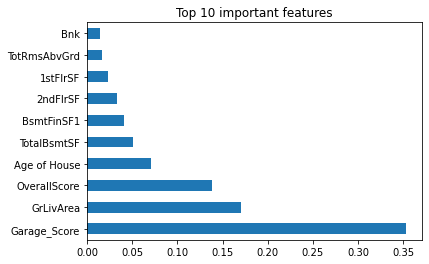

In [191]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(dt.feature_importances_, index=train_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features")
plt.show()

In [192]:
feat_dict = dict(feat_importances.nlargest(10))
feat_dict

{'Garage_Score': 0.3531198072768826,
 'GrLivArea': 0.17031365988940256,
 'OverallScore': 0.1379047676437112,
 'Age of House': 0.07107025100736655,
 'TotalBsmtSF': 0.05105919217380782,
 'BsmtFinSF1': 0.041099390387264054,
 '2ndFlrSF': 0.0325301256029264,
 '1stFlrSF': 0.023234686958434295,
 'TotRmsAbvGrd': 0.016744002296073986,
 'Bnk': 0.01390055126747953}

In [193]:
features_10 = [key for key in feat_dict.keys()]
features_10

['Garage_Score',
 'GrLivArea',
 'OverallScore',
 'Age of House',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '2ndFlrSF',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'Bnk']

In [194]:
train_df5 = pd.DataFrame(data=np.array(train_df[features_10]), columns = features_10)

In [195]:
train_df5.head()

,Garage_Score,GrLivArea,OverallScore,Age of House,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,Bnk
0,730.0,1710.0,12.0,18.0,856.0,706.0,854.0,856.0,8.0,0.0
1,642.0,1262.0,14.0,45.0,1262.0,978.0,0.0,1262.0,6.0,0.0
2,790.0,1786.0,12.0,20.0,920.0,486.0,866.0,920.0,6.0,0.0
3,805.0,1717.0,12.0,106.0,756.0,216.0,756.0,961.0,7.0,0.0
4,1019.0,2198.0,13.0,21.0,1145.0,655.0,1053.0,1145.0,9.0,0.0


In [196]:
train_df5.columns

Index(['Garage_Score', 'GrLivArea', 'OverallScore', 'Age of House',
       'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF', '1stFlrSF', 'TotRmsAbvGrd',
       'Bnk'],
      dtype='object')

<hr>

<center><h1>Linear Regression</h1></center> 
* Choose 3 ML algorithms we covered in the class to build your prediction models [Goal]

<hr>

### Preliminary Train-Test Split : Iteration 1

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
x_train_df1, x_test_df1, y_train_df1, y_test_df1 = train_test_split(train_df1, y, test_size=0.33, random_state=42)

In [199]:
x_train_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,85,5.0,80.0,8800,1.0,1963,156.0,763,0,173,...,0,0,1,0,0,0,13,1.5,3.0,2.000000
613,20,5.0,70.0,8402,1.0,2007,0.0,206,0,914,...,0,0,0,0,0,0,10,3.0,6.0,2.000000
1303,20,5.0,73.0,8688,1.0,2005,228.0,0,0,1616,...,0,0,0,0,0,0,12,1.5,3.5,2.333333
486,20,5.0,79.0,10289,1.0,1965,168.0,836,0,237,...,0,0,0,0,0,0,12,1.2,2.4,2.000000
561,20,5.0,77.0,10010,1.0,1975,0.0,1071,123,195,...,0,0,0,0,0,0,10,1.0,3.0,3.000000


In [200]:
y_train_df1.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [201]:
x_test_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,20,5.0,70.0,8414,1.00,2003,0.0,663,0,396,...,0,0,0,0,0,0,14,2.000000,4.000000,2.000000
1105,60,5.0,98.0,12256,0.75,1995,362.0,1032,0,431,...,0,0,0,0,0,0,13,0.857143,2.571429,3.000000
413,30,7.0,56.0,8960,1.00,1950,0.0,0,0,1008,...,0,0,0,0,0,0,11,2.000000,5.000000,2.500000
522,50,7.0,50.0,5000,1.00,1950,0.0,399,0,605,...,1,0,0,0,0,0,13,1.500000,3.500000,2.333333
1036,20,5.0,89.0,12898,0.75,2008,70.0,1022,0,598,...,0,0,0,0,0,0,14,0.666667,2.000000,3.000000


In [202]:
y_test_df1.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 1

In [203]:
from sklearn.linear_model import LinearRegression
linearRegr = LinearRegression()

In [204]:
linearRegr.fit(x_train_df1, y_train_df1)

LinearRegression()

### Model Testing : Iteration 1

In [205]:
y_pred_df1 = linearRegr.predict(x_test_df1)

In [206]:
y_pred_df1

,0
0,155766.410459
1,316652.106028
2,113832.933485
3,174042.030672
4,309126.699195


### Mean Absolute Error : Iteration 1

In [207]:
from sklearn import metrics

In [208]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df1, y_pred_df1))  

Mean Absolute Error: 24201.765516839318


### Mean Squared Error : Iteration 1

In [209]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df1, y_pred_df1))  

Mean Squared Error: 1693607583.4569182


### Root Mean Squared Error : Iteration 1

In [210]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df1, y_pred_df1)))

Root Mean Squared Error: 41153.46380873569


### Visualization : Iteration 1

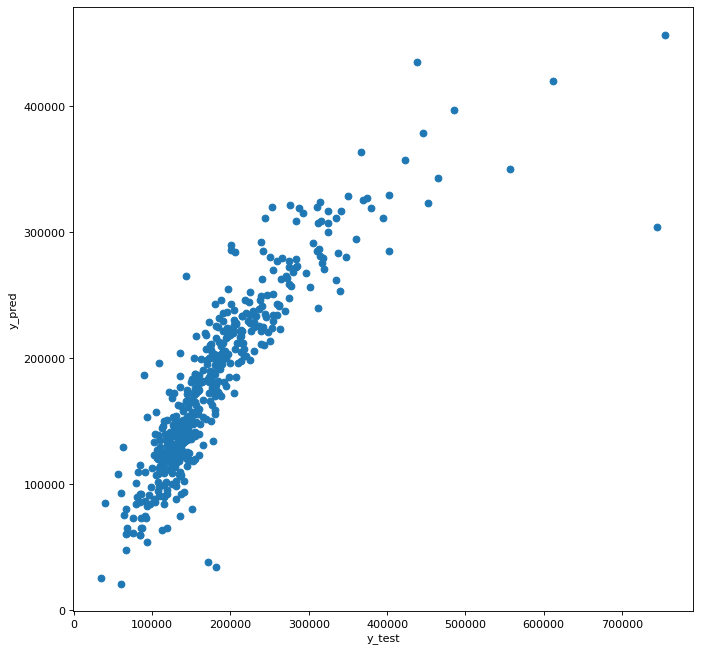

In [211]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df1), np.array(y_pred_df1))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 2

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
x_train_df2, x_test_df2, y_train_df2, y_test_df2 = train_test_split(train_df2, y, test_size=0.33, random_state=42)

In [214]:
x_train_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,0.664586,-0.155266,0.451936,-0.172064,0.701291,-1.059473,0.289821,0.700441,-0.288653,-0.892521,...,-0.343391,-0.098397,6.201569,-0.215859,-0.087129,-0.074227,0.782861,0.049928,-0.220523,-0.537560
613,-0.872563,-0.155266,-0.002269,-0.211952,0.701291,1.072482,-0.574410,-0.521206,-0.288653,0.785029,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,-0.989197,2.296776,2.162303,-0.537560
1303,-0.872563,-0.155266,0.133992,-0.183289,0.701291,0.975575,0.688697,-0.973018,-0.288653,2.374287,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,0.192175,0.049928,0.176614,-0.047828
486,-0.872563,-0.155266,0.406516,-0.022833,0.701291,-0.962566,0.356300,0.860549,-0.288653,-0.747631,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,0.192175,-0.399441,-0.697089,-0.537560
561,-0.872563,-0.155266,0.315675,-0.050795,0.701291,-0.478030,-0.574410,1.375965,0.474072,-0.842715,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,-0.989197,-0.699021,-0.220523,0.931636


In [215]:
y_train_df2.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [216]:
x_test_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,-0.872563,-0.155266,-0.002269,-0.210750,0.701291,0.878668,-0.574410,0.481115,-0.288653,-0.387671,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,1.373547,0.798878,0.573752,-0.537560
1105,0.073375,-0.155266,1.269506,0.174303,-1.016637,0.491040,1.431049,1.290428,-0.288653,-0.308435,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.782861,-0.913006,-0.560927,0.931636
413,-0.636078,1.859747,-0.638156,-0.156028,0.701291,-1.689368,-0.574410,-0.973018,-0.288653,0.997836,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,-0.398511,0.798878,1.368028,0.197038
522,-0.163109,1.859747,-0.910680,-0.552908,0.701291,-1.689368,-0.574410,-0.097907,-0.288653,0.085484,...,2.912133,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.782861,0.049928,0.176614,-0.047828
1036,-0.872563,-0.155266,0.860721,0.238646,-1.016637,1.120936,-0.186614,1.268496,-0.288653,0.069637,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,1.373547,-1.198320,-1.014799,0.931636


In [217]:
y_test_df2.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 2

In [218]:
from sklearn.linear_model import LinearRegression
linearRegr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [219]:
linearRegr.fit(x_train_df2, y_train_df2)

LinearRegression(n_jobs=1)

### Model Testing : Iteration 2

In [220]:
y_pred_df2 = linearRegr.predict(x_test_df2)

In [221]:
y_pred_df2

,0
0,155005.936377
1,316780.100953
2,114541.393665
3,174081.907902
4,309082.600953


### Mean Absolute Error : Iteration 2

In [222]:
from sklearn import metrics

In [223]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df2, y_pred_df2))  

Mean Absolute Error: 24283.0229642097


### Mean Squared Error : Iteration 2

In [224]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df2, y_pred_df2))  

Mean Squared Error: 1701552011.4632628


### Root Mean Squared Error : Iteration 2

In [225]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df2, y_pred_df2)))

Root Mean Squared Error: 41249.87286602545


### Visualization : Iteration 2

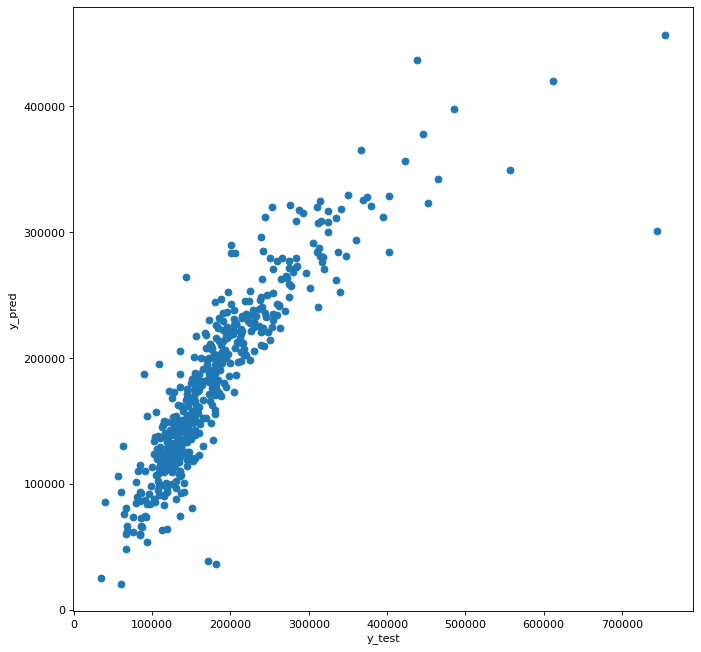

In [226]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df2), np.array(y_pred_df2))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 3

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
x_train_df3, x_test_df3, y_train_df3, y_test_df3 = train_test_split(train_df3, y, test_size=0.33, random_state=42)

In [229]:
x_train_df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,0.009191,0.000541,0.008650,0.951506,0.000108,0.212251,0.016868,0.082500,0.000000,0.018706,...,0.0,0.0,0.000108,0.0,0.0,0.0,0.001406,0.000162,0.000324,0.000216
613,0.002245,0.000561,0.007859,0.943301,0.000112,0.225328,0.000000,0.023128,0.000000,0.102616,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001123,0.000337,0.000674,0.000225
1303,0.002095,0.000524,0.007647,0.910117,0.000105,0.210035,0.023884,0.000000,0.000000,0.169285,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001257,0.000157,0.000367,0.000244
486,0.001869,0.000467,0.007383,0.961528,0.000093,0.183633,0.015700,0.078126,0.000000,0.022148,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001121,0.000112,0.000224,0.000187
561,0.001894,0.000473,0.007290,0.947708,0.000095,0.186985,0.000000,0.101398,0.011645,0.018462,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000947,0.000095,0.000284,0.000284


In [230]:
y_train_df3.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [231]:
x_test_df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,0.002249,0.000562,0.007871,0.946107,0.000112,0.225226,0.000000,0.074551,0.0,0.044528,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001574,0.000225,0.000450,0.000225
1105,0.004615,0.000385,0.007539,0.942792,0.000058,0.153465,0.027847,0.079387,0.0,0.033155,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001000,0.000066,0.000198,0.000231
413,0.003187,0.000744,0.005950,0.951937,0.000106,0.207174,0.000000,0.000000,0.0,0.107093,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001169,0.000212,0.000531,0.000266
522,0.008460,0.001184,0.008460,0.846018,0.000169,0.329947,0.000000,0.067512,0.0,0.102368,...,0.000169,0.0,0.0,0.0,0.0,0.0,0.002200,0.000254,0.000592,0.000395
1036,0.001486,0.000372,0.006614,0.958500,0.000056,0.149222,0.005202,0.075949,0.0,0.044440,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001040,0.000050,0.000149,0.000223


In [232]:
y_test_df3.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 3

In [233]:
from sklearn.linear_model import LinearRegression
linearRegr = LinearRegression(n_jobs=2)

In [234]:
linearRegr.fit(x_train_df3, y_train_df3)

LinearRegression(n_jobs=2)

### Model Testing : Iteration 3

In [235]:
y_pred_df3 = linearRegr.predict(x_test_df3)

In [236]:
y_pred_df3

,0
0,146228.404845
1,305456.871961
2,125309.921083
3,184039.814575
4,279578.400919


### Mean Absolute Error : Iteration 3

In [237]:
from sklearn import metrics

In [238]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df3, y_pred_df3))  

Mean Absolute Error: 31475.314793799516


### Mean Squared Error : Iteration 3

In [239]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df3, y_pred_df3))  

Mean Squared Error: 2533868265.791587


### Root Mean Squared Error : Iteration 3

In [240]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df3, y_pred_df3)))

Root Mean Squared Error: 50337.543303101185


### Visualization : Iteration 3

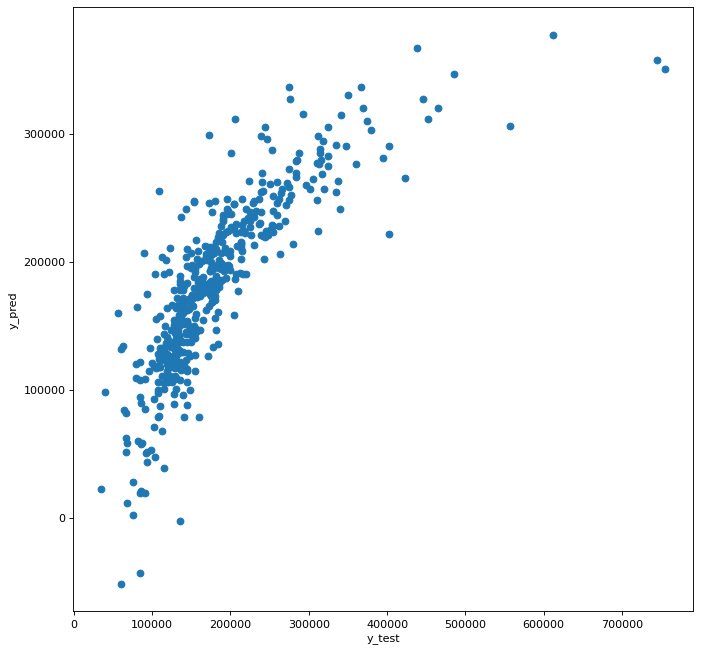

In [241]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df3), np.array(y_pred_df3))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 4

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
x_train_df4, x_test_df4, y_train_df4, y_test_df4 = train_test_split(train_df4, y, test_size=0.33, random_state=42)

In [244]:
x_train_df4.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Con,ConLD,Oth,Partial,Alloca,Bnk,Low,HLS,1.5Unf,2.5Fin
615,85.0,80.0,8800.0,156.0,763.0,0.0,173.0,936.0,1054.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613,20.0,70.0,8402.0,0.0,206.0,0.0,914.0,1120.0,1120.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1303,20.0,73.0,8688.0,228.0,0.0,0.0,1616.0,1616.0,1616.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,20.0,79.0,10289.0,168.0,836.0,0.0,237.0,1073.0,1073.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,20.0,77.0,10010.0,0.0,1071.0,123.0,195.0,1389.0,1389.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
y_train_df4.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [246]:
x_test_df4.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Con,ConLD,Oth,Partial,Alloca,Bnk,Low,HLS,1.5Unf,2.5Fin
892,20.0,70.0,8414.0,0.0,663.0,0.0,396.0,1059.0,1068.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1105,60.0,98.0,12256.0,362.0,1032.0,0.0,431.0,1463.0,1500.0,1122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,30.0,56.0,8960.0,0.0,0.0,0.0,1008.0,1008.0,1028.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,50.0,50.0,5000.0,0.0,399.0,0.0,605.0,1004.0,1004.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,20.0,89.0,12898.0,70.0,1022.0,0.0,598.0,1620.0,1620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [247]:
y_test_df4.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 4

In [248]:
from sklearn.linear_model import LinearRegression
linearRegr = LinearRegression(n_jobs=3)

In [249]:
linearRegr.fit(x_train_df4, y_train_df4)

LinearRegression(n_jobs=3)

### Model Testing : Iteration 4

In [250]:
y_pred_df4 = linearRegr.predict(x_test_df4)

In [251]:
y_pred_df4

array([130725.31376778, 295138.36671072, 105085.98480815, 156617.15729029,
       291261.2275893 ,  58557.17361248, 181098.55886754, 140887.80388862,
        51971.59763314, 172803.58867976, 106279.35139297, 117281.49511895,
        73610.59900871, 202778.94960185, 190997.09511833, 116490.18096373,
       196412.9399185 , 129335.10424889,  79507.47709936, 219738.74086879,
       182065.35080101, 194778.13538252, 188385.42236355, 135904.6311627 ,
       203038.67535578, 155391.20799235, 211894.49702309,  99458.76969037,
       179715.79273543, 201985.39006132,  98645.0291982 , 269706.69430408,
       223921.20573257, 109906.43844575, 227737.82714238, 163789.80552928,
       173812.88262621, 208350.95001939, 285460.70625517,  91519.99358405,
       125739.68192389, 219055.79873547, 125455.01269148, 321357.81821715,
       142561.20921366, 124097.81209012, 117009.53769404, 129430.57562979,
       310340.60906678, 153985.00118223, 111805.28208425, 225727.25781949,
       112551.24407694, 3

### Mean Absolute Error : Iteration 4

In [252]:
from sklearn import metrics

In [253]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df4, y_pred_df4))  

Mean Absolute Error: 27075.13775015193


### Mean Squared Error : Iteration 4

In [254]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df4, y_pred_df4))  

Mean Squared Error: 2076538764.0785012


### Root Mean Squared Error : Iteration 4

In [255]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df4, y_pred_df4)))

Root Mean Squared Error: 45569.054895603236


### Visualization : Iteration 4

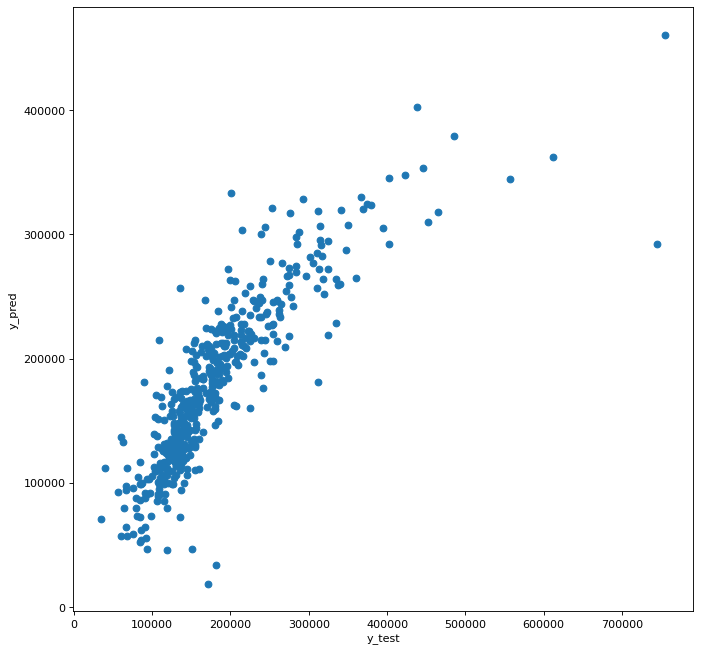

In [256]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df4), np.array(y_pred_df4))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 5

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
x_train_df5, x_test_df5, y_train_df5, y_test_df5 = train_test_split(train_df5, y, test_size=0.33, random_state=42)

In [259]:
x_train_df5.head()

,Garage_Score,GrLivArea,OverallScore,Age of House,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,Bnk
615,662.0,1054.0,13.0,58.0,936.0,763.0,0.0,1054.0,6.0,0.0
613,160.0,1120.0,10.0,14.0,1120.0,206.0,0.0,1120.0,6.0,0.0
1303,1017.0,1616.0,12.0,16.0,1616.0,0.0,0.0,1616.0,7.0,0.0
486,697.0,1073.0,12.0,56.0,1073.0,836.0,0.0,1073.0,6.0,0.0
561,600.0,1389.0,10.0,47.0,1389.0,1071.0,0.0,1389.0,6.0,0.0


In [260]:
y_train_df5.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [261]:
x_test_df5.head()

,Garage_Score,GrLivArea,OverallScore,Age of House,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,Bnk
892,445.0,1068.0,14.0,58.0,1059.0,663.0,0.0,1068.0,6.0,0.0
1105,894.0,2622.0,13.0,27.0,1463.0,1032.0,1122.0,1500.0,9.0,0.0
413,522.0,1028.0,11.0,94.0,1008.0,0.0,0.0,1028.0,5.0,0.0
522,582.0,1664.0,13.0,74.0,1004.0,399.0,660.0,1004.0,7.0,0.0
1036,1135.0,1620.0,14.0,14.0,1620.0,1022.0,0.0,1620.0,6.0,0.0


In [262]:
y_test_df5.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 5

In [263]:
from sklearn.linear_model import LinearRegression
linearRegr = LinearRegression(n_jobs=4)

In [264]:
linearRegr.fit(x_train_df5, y_train_df5)

LinearRegression(n_jobs=4)

### Model Testing : Iteration 5

In [265]:
y_pred_df5 = linearRegr.predict(x_test_df5)

In [266]:
y_pred_df5

,0
0,172645.788215
1,297479.469379
2,102649.717897
3,181777.450270
4,280846.208767


### Mean Absolute Error : Iteration 5

In [267]:
from sklearn import metrics

In [268]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df5, y_pred_df5))  

Mean Absolute Error: 23133.087151811167


### Mean Squared Error : Iteration 5

In [269]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df5, y_pred_df5))  

Mean Squared Error: 1444801975.814549


### Root Mean Squared Error : Iteration 5

In [270]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df5, y_pred_df5)))

Root Mean Squared Error: 38010.55084860714


### Visualization : Iteration 5

In [271]:
import numpy as np
from matplotlib.pyplot import figure

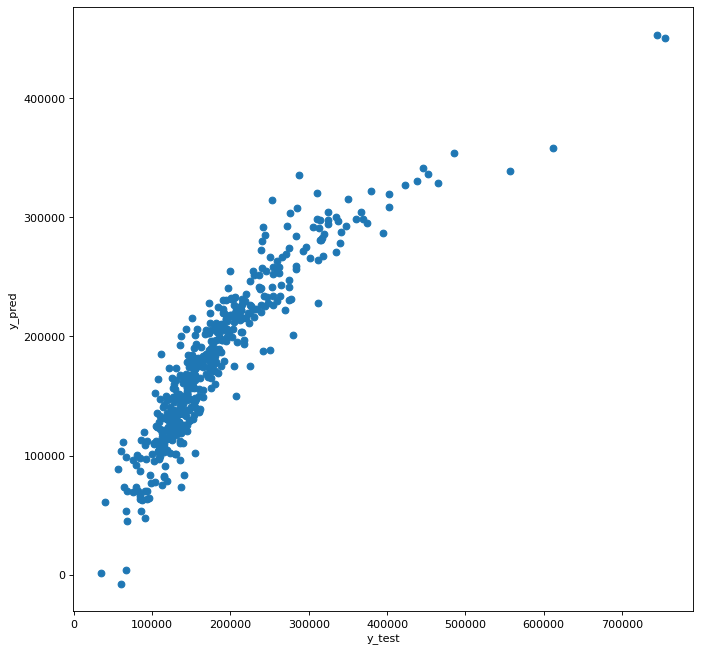

In [272]:
figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df5), np.array(y_pred_df5))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<center><h1>Support Vector Regression (SVR)</h1></center> 
* Choose 3 ML algorithms we covered in the class to build your prediction models [Goal]

<hr>

### Preliminary Train-Test Split : Iteration 1

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
x_train_df1, x_test_df1, y_train_df1, y_test_df1 = train_test_split(train_df1, y, test_size=0.33, random_state=42)

In [275]:
x_train_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,85,5.0,80.0,8800,1.0,1963,156.0,763,0,173,...,0,0,1,0,0,0,13,1.5,3.0,2.000000
613,20,5.0,70.0,8402,1.0,2007,0.0,206,0,914,...,0,0,0,0,0,0,10,3.0,6.0,2.000000
1303,20,5.0,73.0,8688,1.0,2005,228.0,0,0,1616,...,0,0,0,0,0,0,12,1.5,3.5,2.333333
486,20,5.0,79.0,10289,1.0,1965,168.0,836,0,237,...,0,0,0,0,0,0,12,1.2,2.4,2.000000
561,20,5.0,77.0,10010,1.0,1975,0.0,1071,123,195,...,0,0,0,0,0,0,10,1.0,3.0,3.000000


In [276]:
y_train_df1.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [277]:
x_test_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,20,5.0,70.0,8414,1.00,2003,0.0,663,0,396,...,0,0,0,0,0,0,14,2.000000,4.000000,2.000000
1105,60,5.0,98.0,12256,0.75,1995,362.0,1032,0,431,...,0,0,0,0,0,0,13,0.857143,2.571429,3.000000
413,30,7.0,56.0,8960,1.00,1950,0.0,0,0,1008,...,0,0,0,0,0,0,11,2.000000,5.000000,2.500000
522,50,7.0,50.0,5000,1.00,1950,0.0,399,0,605,...,1,0,0,0,0,0,13,1.500000,3.500000,2.333333
1036,20,5.0,89.0,12898,0.75,2008,70.0,1022,0,598,...,0,0,0,0,0,0,14,0.666667,2.000000,3.000000


In [278]:
y_test_df1.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 1

In [279]:
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2)

In [280]:
svr.fit(x_train_df1, y_train_df1)

SVR(epsilon=0.2)

### Model Testing : Iteration 1

In [281]:
y_pred_df1 = svr.predict(x_test_df1)

In [282]:
y_pred_df1

,0
0,164983.252078
1,165020.789281
2,164987.587349
3,164961.424848
4,165023.647447


### Mean Absolute Error : Iteration 1

In [283]:
from sklearn import metrics

In [284]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df1, y_pred_df1))  

Mean Absolute Error: 57375.82082831691


### Mean Squared Error : Iteration 2

In [285]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df1, y_pred_df1))  

Mean Squared Error: 7584835556.460259


### Root Mean Squared Error : Iteration 3

In [286]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df1, y_pred_df1)))

Root Mean Squared Error: 87090.96139359273


### Visualization : Iteration 3

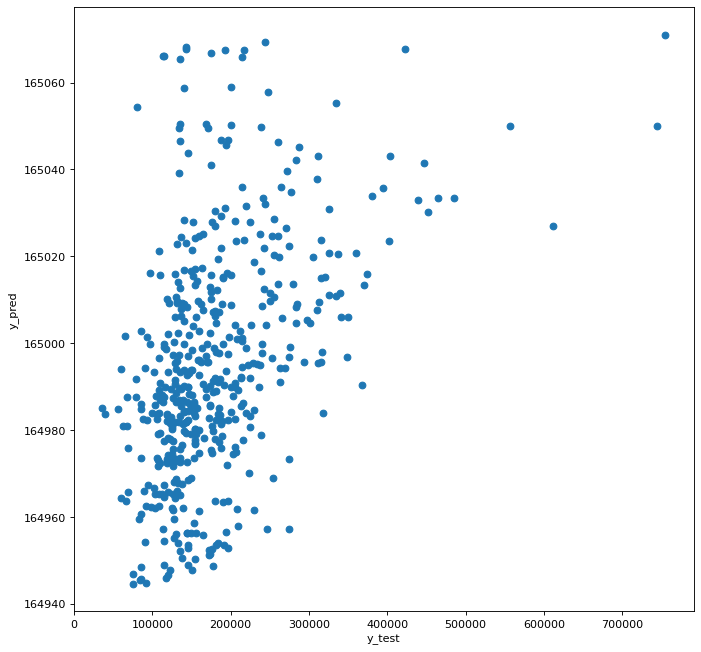

In [287]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df1), np.array(y_pred_df1))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 2

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
x_train_df2, x_test_df2, y_train_df2, y_test_df2 = train_test_split(train_df2, y, test_size=0.33, random_state=42)

In [290]:
x_train_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,0.664586,-0.155266,0.451936,-0.172064,0.701291,-1.059473,0.289821,0.700441,-0.288653,-0.892521,...,-0.343391,-0.098397,6.201569,-0.215859,-0.087129,-0.074227,0.782861,0.049928,-0.220523,-0.537560
613,-0.872563,-0.155266,-0.002269,-0.211952,0.701291,1.072482,-0.574410,-0.521206,-0.288653,0.785029,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,-0.989197,2.296776,2.162303,-0.537560
1303,-0.872563,-0.155266,0.133992,-0.183289,0.701291,0.975575,0.688697,-0.973018,-0.288653,2.374287,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,0.192175,0.049928,0.176614,-0.047828
486,-0.872563,-0.155266,0.406516,-0.022833,0.701291,-0.962566,0.356300,0.860549,-0.288653,-0.747631,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,0.192175,-0.399441,-0.697089,-0.537560
561,-0.872563,-0.155266,0.315675,-0.050795,0.701291,-0.478030,-0.574410,1.375965,0.474072,-0.842715,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,-0.989197,-0.699021,-0.220523,0.931636


In [291]:
y_train_df2.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [292]:
x_test_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,-0.872563,-0.155266,-0.002269,-0.210750,0.701291,0.878668,-0.574410,0.481115,-0.288653,-0.387671,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,1.373547,0.798878,0.573752,-0.537560
1105,0.073375,-0.155266,1.269506,0.174303,-1.016637,0.491040,1.431049,1.290428,-0.288653,-0.308435,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.782861,-0.913006,-0.560927,0.931636
413,-0.636078,1.859747,-0.638156,-0.156028,0.701291,-1.689368,-0.574410,-0.973018,-0.288653,0.997836,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,-0.398511,0.798878,1.368028,0.197038
522,-0.163109,1.859747,-0.910680,-0.552908,0.701291,-1.689368,-0.574410,-0.097907,-0.288653,0.085484,...,2.912133,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.782861,0.049928,0.176614,-0.047828
1036,-0.872563,-0.155266,0.860721,0.238646,-1.016637,1.120936,-0.186614,1.268496,-0.288653,0.069637,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,1.373547,-1.198320,-1.014799,0.931636


In [293]:
y_test_df2.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 2

In [294]:
from sklearn.svm import SVR
svr = SVR(C=2.0, epsilon=0.4)

In [295]:
svr.fit(x_train_df2, y_train_df2)

SVR(C=2.0, epsilon=0.4)

### Model Testing : Iteration 2

In [296]:
y_pred_df2 = svr.predict(x_test_df2)

In [297]:
y_pred_df2

,0
0,164891.688962
1,165110.460735
2,164816.024560
3,164905.128535
4,165016.283050


### Mean Absolute Error : Iteration 2

In [298]:
from sklearn import metrics

In [299]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df2, y_pred_df2))  

Mean Absolute Error: 57323.56604605911


### Mean Squared Error : Iteration 2

In [300]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df2, y_pred_df2))  

Mean Squared Error: 7579902305.864407


### Root Mean Squared Error : Iteration 2

In [301]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df2, y_pred_df2)))

Root Mean Squared Error: 87062.63438389862


### Visualization : Iteration 2

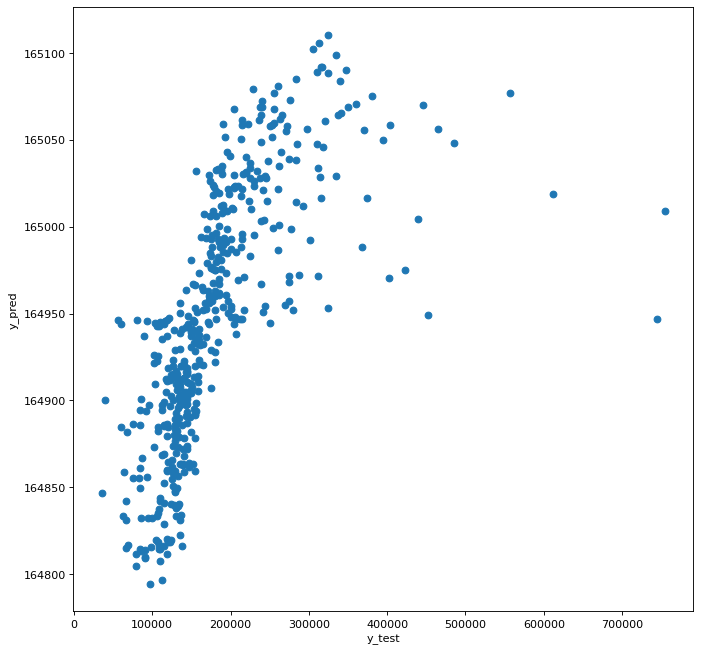

In [302]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df2), np.array(y_pred_df2))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 3

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
x_train_df3, x_test_df3, y_train_df3, y_test_df3 = train_test_split(train_df3, y, test_size=0.33, random_state=42)

In [305]:
x_train_df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,0.009191,0.000541,0.008650,0.951506,0.000108,0.212251,0.016868,0.082500,0.000000,0.018706,...,0.0,0.0,0.000108,0.0,0.0,0.0,0.001406,0.000162,0.000324,0.000216
613,0.002245,0.000561,0.007859,0.943301,0.000112,0.225328,0.000000,0.023128,0.000000,0.102616,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001123,0.000337,0.000674,0.000225
1303,0.002095,0.000524,0.007647,0.910117,0.000105,0.210035,0.023884,0.000000,0.000000,0.169285,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001257,0.000157,0.000367,0.000244
486,0.001869,0.000467,0.007383,0.961528,0.000093,0.183633,0.015700,0.078126,0.000000,0.022148,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001121,0.000112,0.000224,0.000187
561,0.001894,0.000473,0.007290,0.947708,0.000095,0.186985,0.000000,0.101398,0.011645,0.018462,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000947,0.000095,0.000284,0.000284


In [306]:
y_train_df3.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [307]:
x_test_df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,0.002249,0.000562,0.007871,0.946107,0.000112,0.225226,0.000000,0.074551,0.0,0.044528,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001574,0.000225,0.000450,0.000225
1105,0.004615,0.000385,0.007539,0.942792,0.000058,0.153465,0.027847,0.079387,0.0,0.033155,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001000,0.000066,0.000198,0.000231
413,0.003187,0.000744,0.005950,0.951937,0.000106,0.207174,0.000000,0.000000,0.0,0.107093,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001169,0.000212,0.000531,0.000266
522,0.008460,0.001184,0.008460,0.846018,0.000169,0.329947,0.000000,0.067512,0.0,0.102368,...,0.000169,0.0,0.0,0.0,0.0,0.0,0.002200,0.000254,0.000592,0.000395
1036,0.001486,0.000372,0.006614,0.958500,0.000056,0.149222,0.005202,0.075949,0.0,0.044440,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001040,0.000050,0.000149,0.000223


In [308]:
y_test_df3.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 3

In [309]:
from sklearn.svm import SVR
svr = SVR(C=3.0, epsilon=0.3)

In [310]:
svr.fit(x_train_df3, y_train_df3)

SVR(C=3.0, epsilon=0.3)

### Model Testing : Iteration 3

In [311]:
y_pred_df3 = svr.predict(x_test_df3)

In [312]:
y_pred_df3

array([164987.98278007, 165006.83080134, 164990.75595325, 164977.03767168,
       165002.38633962, 164914.39925076, 165004.91155755, 164944.02233749,
       164917.83972278, 165003.81376555, 164983.38629765, 164990.7589982 ,
       165003.40352288, 164997.93729248, 164992.45973444, 164988.7400178 ,
       164993.08360011, 164982.05694457, 164988.43356429, 164997.69430364,
       165000.009639  , 164994.27116116, 164992.25157102, 164973.38431652,
       164994.07408406, 164988.41096956, 164993.08675867, 165003.37076449,
       164998.69699062, 164969.84350322, 164984.21031199, 165001.3356808 ,
       165009.97851108, 164988.29739046, 165003.78287529, 164992.01701021,
       164990.04144524, 164994.34765766, 165007.79153274, 164993.756415  ,
       164978.945988  , 164995.98324877, 164990.79453234, 165005.8873652 ,
       164992.57677155, 165000.28788261, 164983.03783105, 164984.76581944,
       165006.84029163, 164999.14540905, 164982.20805268, 164996.26162047,
       164940.45054489, 1

### Mean Absolute Error : Iteration 3

In [313]:
from sklearn import metrics

In [314]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df3, y_pred_df3))  

Mean Absolute Error: 57378.644723864


### Mean Squared Error : Iteration 3

In [315]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df3, y_pred_df3))  

Mean Squared Error: 7585882179.735438


### Root Mean Squared Error : Iteration 3

In [316]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df3, y_pred_df3)))

Root Mean Squared Error: 87096.96998022054


### Visualization : Iteration 3

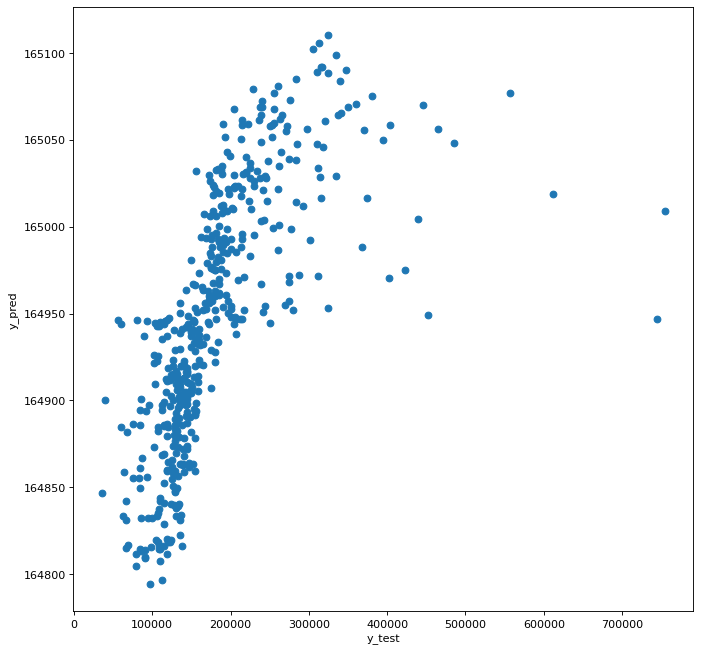

In [317]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df2), np.array(y_pred_df2))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 4

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
x_train_df4, x_test_df4, y_train_df4, y_test_df4 = train_test_split(train_df4, y, test_size=0.33, random_state=42)

In [320]:
x_train_df4.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Con,ConLD,Oth,Partial,Alloca,Bnk,Low,HLS,1.5Unf,2.5Fin
615,85.0,80.0,8800.0,156.0,763.0,0.0,173.0,936.0,1054.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613,20.0,70.0,8402.0,0.0,206.0,0.0,914.0,1120.0,1120.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1303,20.0,73.0,8688.0,228.0,0.0,0.0,1616.0,1616.0,1616.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,20.0,79.0,10289.0,168.0,836.0,0.0,237.0,1073.0,1073.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,20.0,77.0,10010.0,0.0,1071.0,123.0,195.0,1389.0,1389.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
y_train_df4.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [322]:
x_test_df4.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Con,ConLD,Oth,Partial,Alloca,Bnk,Low,HLS,1.5Unf,2.5Fin
892,20.0,70.0,8414.0,0.0,663.0,0.0,396.0,1059.0,1068.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1105,60.0,98.0,12256.0,362.0,1032.0,0.0,431.0,1463.0,1500.0,1122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,30.0,56.0,8960.0,0.0,0.0,0.0,1008.0,1008.0,1028.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,50.0,50.0,5000.0,0.0,399.0,0.0,605.0,1004.0,1004.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,20.0,89.0,12898.0,70.0,1022.0,0.0,598.0,1620.0,1620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [323]:
y_test_df4.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 4

In [324]:
from sklearn.svm import SVR
svr = SVR(C=4.0, epsilon=0.4)

In [325]:
svr.fit(x_train_df4, y_train_df4)

SVR(C=4.0, epsilon=0.4)

### Model Testing : Iteration 4

In [326]:
y_pred_df4 = svr.predict(x_test_df4)

In [327]:
y_pred_df4

,0
0,164931.558049
1,165084.956138
2,164949.284230
3,164842.723866
4,165096.573931


### Mean Absolute Error : Iteration 4

In [328]:
from sklearn import metrics

In [329]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df4, y_pred_df4))  

Mean Absolute Error: 57346.52325283724


### Mean Squared Error : Iteration 4

In [330]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df4, y_pred_df4))  

Mean Squared Error: 7578764633.787944


### Root Mean Squared Error : Iteration 4

In [331]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df4, y_pred_df4)))

Root Mean Squared Error: 87056.10049725375


### Visualization : Iteration 4

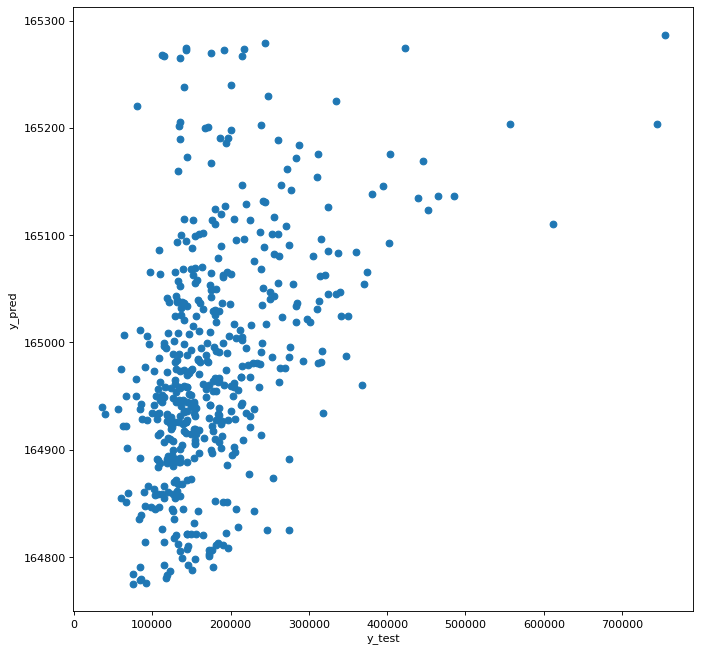

In [332]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df4), np.array(y_pred_df4))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 5

In [333]:
from sklearn.model_selection import train_test_split

In [334]:
x_train_df5, x_test_df5, y_train_df5, y_test_df5 = train_test_split(train_df5, y, test_size=0.33, random_state=42)

In [335]:
x_train_df5.head()

,Garage_Score,GrLivArea,OverallScore,Age of House,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,Bnk
615,662.0,1054.0,13.0,58.0,936.0,763.0,0.0,1054.0,6.0,0.0
613,160.0,1120.0,10.0,14.0,1120.0,206.0,0.0,1120.0,6.0,0.0
1303,1017.0,1616.0,12.0,16.0,1616.0,0.0,0.0,1616.0,7.0,0.0
486,697.0,1073.0,12.0,56.0,1073.0,836.0,0.0,1073.0,6.0,0.0
561,600.0,1389.0,10.0,47.0,1389.0,1071.0,0.0,1389.0,6.0,0.0


In [336]:
y_train_df5.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [337]:
x_test_df5.head()

,Garage_Score,GrLivArea,OverallScore,Age of House,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,Bnk
892,445.0,1068.0,14.0,58.0,1059.0,663.0,0.0,1068.0,6.0,0.0
1105,894.0,2622.0,13.0,27.0,1463.0,1032.0,1122.0,1500.0,9.0,0.0
413,522.0,1028.0,11.0,94.0,1008.0,0.0,0.0,1028.0,5.0,0.0
522,582.0,1664.0,13.0,74.0,1004.0,399.0,660.0,1004.0,7.0,0.0
1036,1135.0,1620.0,14.0,14.0,1620.0,1022.0,0.0,1620.0,6.0,0.0


In [338]:
y_test_df5.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 5

In [339]:
from sklearn.svm import SVR
svr = SVR(C=5.0, epsilon=0.5)

In [340]:
svr.fit(x_train_df5, y_train_df5)

SVR(C=5.0, epsilon=0.5)

### Model Testing : Iteration 5

In [341]:
y_pred_df5 = svr.predict(x_test_df5)

In [342]:
y_pred_df5

,0
0,164736.358235
1,165736.382705
2,164655.931260
3,165102.721489
4,165466.975359


### Mean Absolute Error : Iteration 5

In [343]:
from sklearn import metrics

In [344]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df5, y_pred_df5))  

Mean Absolute Error: 57128.437763902526


### Mean Squared Error : Iteration 5

In [345]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df5, y_pred_df5))  

Mean Squared Error: 7540387053.537355


### Root Mean Squared Error : Iteration 5

In [346]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df5, y_pred_df5)))

Root Mean Squared Error: 86835.40207506012


### Visualization : Iteration 5

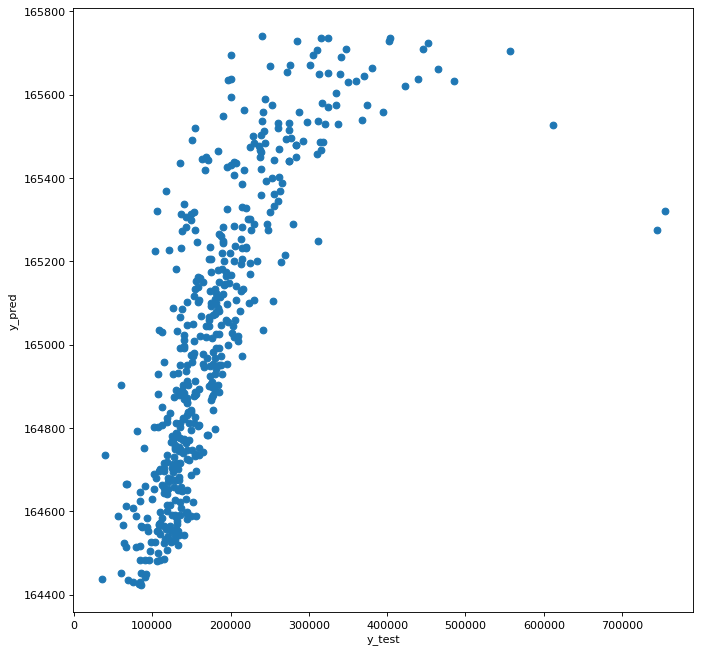

In [347]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df5), np.array(y_pred_df5))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<center><h1>Decision Tree Regressor</h1></center> 
* Choose 3 ML algorithms we covered in the class to build your prediction models [Goal]

<hr>

### Preliminary Train-Test Split : Iteration 1

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
x_train_df1, x_test_df1, y_train_df1, y_test_df1 = train_test_split(train_df1, y, test_size=0.33, random_state=42)

In [350]:
x_train_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,85,5.0,80.0,8800,1.0,1963,156.0,763,0,173,...,0,0,1,0,0,0,13,1.5,3.0,2.000000
613,20,5.0,70.0,8402,1.0,2007,0.0,206,0,914,...,0,0,0,0,0,0,10,3.0,6.0,2.000000
1303,20,5.0,73.0,8688,1.0,2005,228.0,0,0,1616,...,0,0,0,0,0,0,12,1.5,3.5,2.333333
486,20,5.0,79.0,10289,1.0,1965,168.0,836,0,237,...,0,0,0,0,0,0,12,1.2,2.4,2.000000
561,20,5.0,77.0,10010,1.0,1975,0.0,1071,123,195,...,0,0,0,0,0,0,10,1.0,3.0,3.000000


In [351]:
y_train_df1.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [352]:
x_test_df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,20,5.0,70.0,8414,1.00,2003,0.0,663,0,396,...,0,0,0,0,0,0,14,2.000000,4.000000,2.000000
1105,60,5.0,98.0,12256,0.75,1995,362.0,1032,0,431,...,0,0,0,0,0,0,13,0.857143,2.571429,3.000000
413,30,7.0,56.0,8960,1.00,1950,0.0,0,0,1008,...,0,0,0,0,0,0,11,2.000000,5.000000,2.500000
522,50,7.0,50.0,5000,1.00,1950,0.0,399,0,605,...,1,0,0,0,0,0,13,1.500000,3.500000,2.333333
1036,20,5.0,89.0,12898,0.75,2008,70.0,1022,0,598,...,0,0,0,0,0,0,14,0.666667,2.000000,3.000000


In [353]:
y_test_df1.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 1

In [354]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [355]:
dt.fit(x_train_df1, y_train_df1)

DecisionTreeRegressor()

### Model Testing : Iteration 1

In [356]:
y_pred_df1 = dt.predict(x_test_df1)

In [357]:
y_pred_df1

,0
0,130000.0
1,305900.0
2,87000.0
3,177000.0
4,326000.0


### Mean Absolute Error : Iteration 1

In [358]:
from sklearn import metrics

In [359]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df1, y_pred_df1))  

Mean Absolute Error: 28426.894190871368


### Mean Squared Error : Iteration 1

In [360]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df1, y_pred_df1))  

Mean Squared Error: 2113861235.3879669


### Root Mean Squared Error : Iteration 1

In [361]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df1, y_pred_df1)))

Root Mean Squared Error: 45976.74668120796


### Visualization : Iteration 1

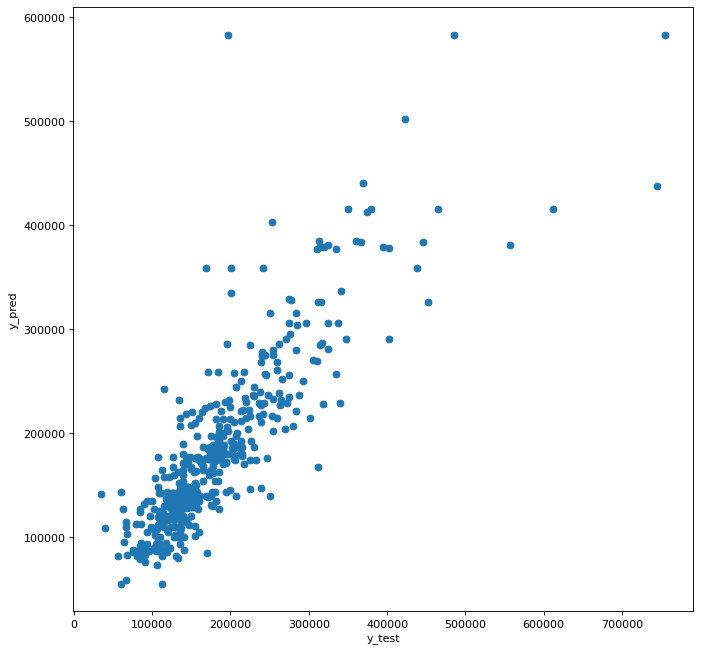

In [362]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df1), np.array(y_pred_df1))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 2

In [363]:
from sklearn.model_selection import train_test_split

In [364]:
x_train_df2, x_test_df2, y_train_df2, y_test_df2 = train_test_split(train_df2, y, test_size=0.33, random_state=42)

In [365]:
x_train_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,0.664586,-0.155266,0.451936,-0.172064,0.701291,-1.059473,0.289821,0.700441,-0.288653,-0.892521,...,-0.343391,-0.098397,6.201569,-0.215859,-0.087129,-0.074227,0.782861,0.049928,-0.220523,-0.537560
613,-0.872563,-0.155266,-0.002269,-0.211952,0.701291,1.072482,-0.574410,-0.521206,-0.288653,0.785029,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,-0.989197,2.296776,2.162303,-0.537560
1303,-0.872563,-0.155266,0.133992,-0.183289,0.701291,0.975575,0.688697,-0.973018,-0.288653,2.374287,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,0.192175,0.049928,0.176614,-0.047828
486,-0.872563,-0.155266,0.406516,-0.022833,0.701291,-0.962566,0.356300,0.860549,-0.288653,-0.747631,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,0.192175,-0.399441,-0.697089,-0.537560
561,-0.872563,-0.155266,0.315675,-0.050795,0.701291,-0.478030,-0.574410,1.375965,0.474072,-0.842715,...,-0.343391,-0.098397,-0.161250,-0.215859,-0.087129,-0.074227,-0.989197,-0.699021,-0.220523,0.931636


In [366]:
y_train_df2.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [367]:
x_test_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,-0.872563,-0.155266,-0.002269,-0.210750,0.701291,0.878668,-0.574410,0.481115,-0.288653,-0.387671,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,1.373547,0.798878,0.573752,-0.537560
1105,0.073375,-0.155266,1.269506,0.174303,-1.016637,0.491040,1.431049,1.290428,-0.288653,-0.308435,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.782861,-0.913006,-0.560927,0.931636
413,-0.636078,1.859747,-0.638156,-0.156028,0.701291,-1.689368,-0.574410,-0.973018,-0.288653,0.997836,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,-0.398511,0.798878,1.368028,0.197038
522,-0.163109,1.859747,-0.910680,-0.552908,0.701291,-1.689368,-0.574410,-0.097907,-0.288653,0.085484,...,2.912133,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,0.782861,0.049928,0.176614,-0.047828
1036,-0.872563,-0.155266,0.860721,0.238646,-1.016637,1.120936,-0.186614,1.268496,-0.288653,0.069637,...,-0.343391,-0.098397,-0.16125,-0.215859,-0.087129,-0.074227,1.373547,-1.198320,-1.014799,0.931636


In [368]:
y_test_df2.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 2

In [369]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(splitter='best', max_depth=2)

In [370]:
dt.fit(x_train_df2, y_train_df2)

DecisionTreeRegressor(max_depth=2)

### Model Testing : Iteration 2

In [371]:
y_pred_df2 = dt.predict(x_test_df2)

In [372]:
y_pred_df2

,0
0,126473.765464
1,304859.076271
2,126473.765464
3,200662.641243
4,304859.076271


### Mean Absolute Error : Iteration 2

In [373]:
from sklearn import metrics

In [374]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df2, y_pred_df2))  

Mean Absolute Error: 36211.69549247304


### Mean Squared Error : Iteration 2

In [375]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df2, y_pred_df2))  

Mean Squared Error: 3267101950.9482937


### Root Mean Sqaured Error : Iteration 2

In [376]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df2, y_pred_df2)))

Root Mean Squared Error: 57158.568482322


### Visualization : Iteration 2

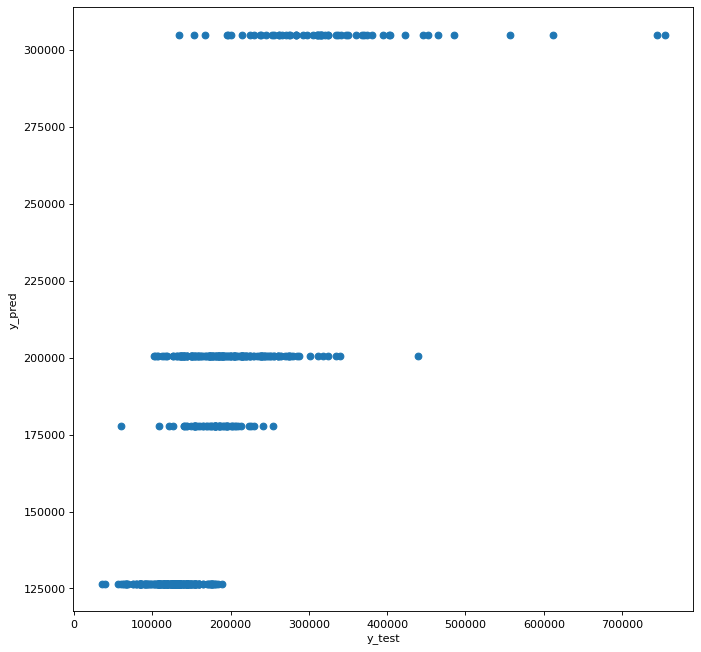

In [377]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df2), np.array(y_pred_df2))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 3

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
x_train_df3, x_test_df3, y_train_df3, y_test_df3 = train_test_split(train_df3, y, test_size=0.33, random_state=42)

In [380]:
x_train_df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
615,0.009191,0.000541,0.008650,0.951506,0.000108,0.212251,0.016868,0.082500,0.000000,0.018706,...,0.0,0.0,0.000108,0.0,0.0,0.0,0.001406,0.000162,0.000324,0.000216
613,0.002245,0.000561,0.007859,0.943301,0.000112,0.225328,0.000000,0.023128,0.000000,0.102616,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001123,0.000337,0.000674,0.000225
1303,0.002095,0.000524,0.007647,0.910117,0.000105,0.210035,0.023884,0.000000,0.000000,0.169285,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001257,0.000157,0.000367,0.000244
486,0.001869,0.000467,0.007383,0.961528,0.000093,0.183633,0.015700,0.078126,0.000000,0.022148,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.001121,0.000112,0.000224,0.000187
561,0.001894,0.000473,0.007290,0.947708,0.000095,0.186985,0.000000,0.101398,0.011645,0.018462,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000947,0.000095,0.000284,0.000284


In [381]:
y_train_df3.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [382]:
x_test_df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin,OverallScore,Bed to Bath Ratio,Rooms to Bath Ratio,Rooms to Bed Ratio
892,0.002249,0.000562,0.007871,0.946107,0.000112,0.225226,0.000000,0.074551,0.0,0.044528,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001574,0.000225,0.000450,0.000225
1105,0.004615,0.000385,0.007539,0.942792,0.000058,0.153465,0.027847,0.079387,0.0,0.033155,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001000,0.000066,0.000198,0.000231
413,0.003187,0.000744,0.005950,0.951937,0.000106,0.207174,0.000000,0.000000,0.0,0.107093,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001169,0.000212,0.000531,0.000266
522,0.008460,0.001184,0.008460,0.846018,0.000169,0.329947,0.000000,0.067512,0.0,0.102368,...,0.000169,0.0,0.0,0.0,0.0,0.0,0.002200,0.000254,0.000592,0.000395
1036,0.001486,0.000372,0.006614,0.958500,0.000056,0.149222,0.005202,0.075949,0.0,0.044440,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.001040,0.000050,0.000149,0.000223


In [383]:
y_test_df3.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 3

In [384]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(splitter='best', max_depth=20, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)

In [385]:
dt.fit(x_train_df3, y_train_df3)

DecisionTreeRegressor(max_depth=20)

### Model Testing : Iteration 3

In [386]:
y_pred_df3 = dt.predict(x_test_df3)

In [387]:
y_pred_df3

,0
0,132500.0
1,345000.0
2,124000.0
3,164000.0
4,370878.0


### Mean Absolute Error : Iteration 3

In [388]:
from sklearn import metrics

In [389]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df3, y_pred_df3))  

Mean Absolute Error: 33935.13692946058


### Mean Squared Error : Iteration 3

In [390]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df3, y_pred_df3))  

Mean Squared Error: 3296935406.8049793


### Root Mean Squared Error : Iteration 3

In [391]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df3, y_pred_df3)))

Root Mean Squared Error: 57418.94640974335


### Visualization : Iteration 3

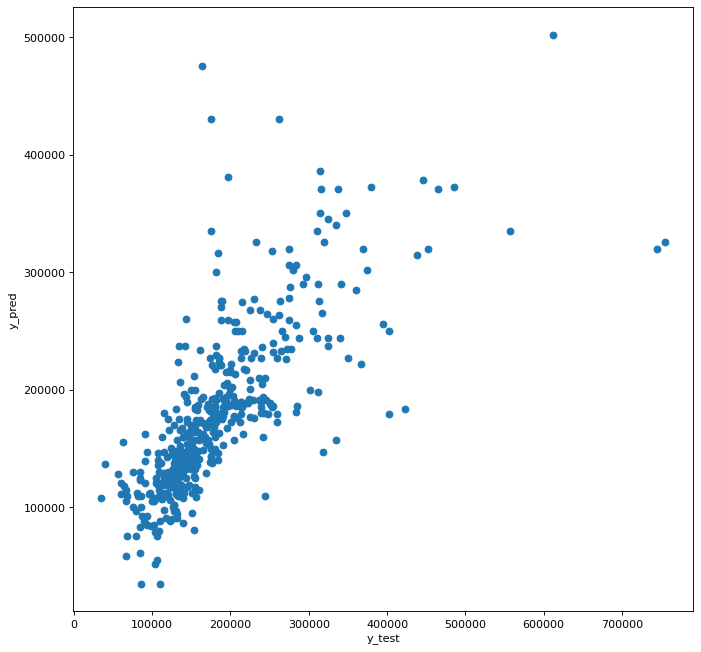

In [392]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df3), np.array(y_pred_df3))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 4

In [393]:
from sklearn.model_selection import train_test_split

In [394]:
x_train_df4, x_test_df4, y_train_df4, y_test_df4 = train_test_split(train_df4, y, test_size=0.33, random_state=42)

In [395]:
x_train_df4.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Con,ConLD,Oth,Partial,Alloca,Bnk,Low,HLS,1.5Unf,2.5Fin
615,85.0,80.0,8800.0,156.0,763.0,0.0,173.0,936.0,1054.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613,20.0,70.0,8402.0,0.0,206.0,0.0,914.0,1120.0,1120.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1303,20.0,73.0,8688.0,228.0,0.0,0.0,1616.0,1616.0,1616.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,20.0,79.0,10289.0,168.0,836.0,0.0,237.0,1073.0,1073.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,20.0,77.0,10010.0,0.0,1071.0,123.0,195.0,1389.0,1389.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [396]:
y_train_df4.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [397]:
x_test_df4.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Con,ConLD,Oth,Partial,Alloca,Bnk,Low,HLS,1.5Unf,2.5Fin
892,20.0,70.0,8414.0,0.0,663.0,0.0,396.0,1059.0,1068.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1105,60.0,98.0,12256.0,362.0,1032.0,0.0,431.0,1463.0,1500.0,1122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,30.0,56.0,8960.0,0.0,0.0,0.0,1008.0,1008.0,1028.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,50.0,50.0,5000.0,0.0,399.0,0.0,605.0,1004.0,1004.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,20.0,89.0,12898.0,70.0,1022.0,0.0,598.0,1620.0,1620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [398]:
y_test_df4.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 4

In [399]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)

In [400]:
dt.fit(x_train_df4, y_train_df4)

DecisionTreeRegressor(max_depth=10)

### Model Testing : Iteration 4

In [401]:
y_pred_df4 = dt.predict(x_test_df4)

In [402]:
y_pred_df4

,0
0,126418.181818
1,424870.000000
2,115931.608696
3,140368.413793
4,251000.000000


### Mean Absolute Error : Iteration 4

In [403]:
from sklearn import metrics

In [404]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df4, y_pred_df4))  

Mean Absolute Error: 31441.0783376867


### Mean Sqaured Error : Iteration 4

In [405]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df4, y_pred_df4))  

Mean Squared Error: 2977649465.205759


### Root Mean Sqaured Error : Iteration 4

In [406]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df4, y_pred_df4)))

Root Mean Squared Error: 54567.84277581219


### Visualization : Iteration 4

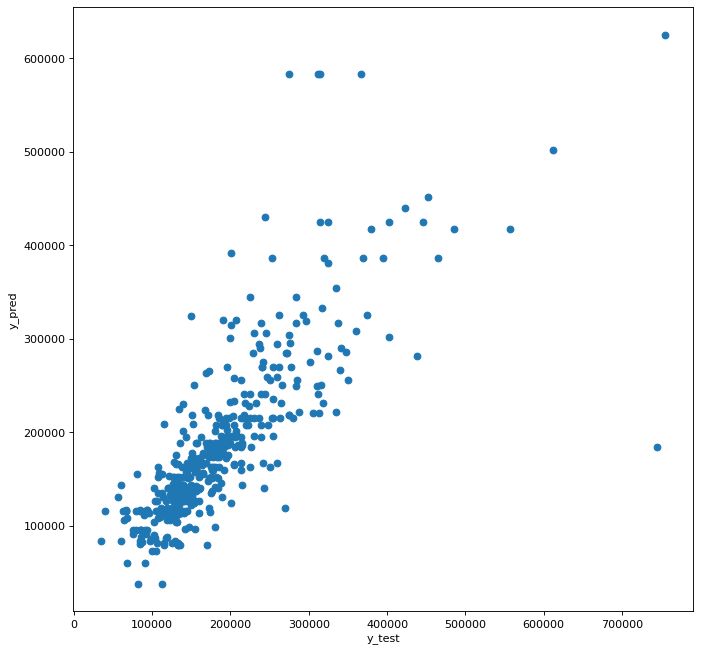

In [407]:
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df4), np.array(y_pred_df4))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>

### Preliminary Train-Test Split : Iteration 5

In [408]:
from sklearn.model_selection import train_test_split

In [409]:
x_train_df5, x_test_df5, y_train_df5, y_test_df5 = train_test_split(train_df5, y, test_size=0.33, random_state=42)

In [410]:
x_train_df5.head()

,Garage_Score,GrLivArea,OverallScore,Age of House,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,Bnk
615,662.0,1054.0,13.0,58.0,936.0,763.0,0.0,1054.0,6.0,0.0
613,160.0,1120.0,10.0,14.0,1120.0,206.0,0.0,1120.0,6.0,0.0
1303,1017.0,1616.0,12.0,16.0,1616.0,0.0,0.0,1616.0,7.0,0.0
486,697.0,1073.0,12.0,56.0,1073.0,836.0,0.0,1073.0,6.0,0.0
561,600.0,1389.0,10.0,47.0,1389.0,1071.0,0.0,1389.0,6.0,0.0


In [411]:
y_train_df5.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [412]:
x_test_df5.head()

,Garage_Score,GrLivArea,OverallScore,Age of House,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,1stFlrSF,TotRmsAbvGrd,Bnk
892,445.0,1068.0,14.0,58.0,1059.0,663.0,0.0,1068.0,6.0,0.0
1105,894.0,2622.0,13.0,27.0,1463.0,1032.0,1122.0,1500.0,9.0,0.0
413,522.0,1028.0,11.0,94.0,1008.0,0.0,0.0,1028.0,5.0,0.0
522,582.0,1664.0,13.0,74.0,1004.0,399.0,660.0,1004.0,7.0,0.0
1036,1135.0,1620.0,14.0,14.0,1620.0,1022.0,0.0,1620.0,6.0,0.0


In [413]:
y_test_df5.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

### Model Training : Iteration 5

In [414]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=10, min_weight_fraction_leaf=0.0)

In [415]:
dt.fit(x_train_df5, y_train_df5)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=3)

### Model Testing : Iteration 5

In [416]:
y_pred_df5 = dt.predict(x_test_df5)

In [417]:
pd.DataFrame(y_pred_df5).head()

,0
0,148370.000000
1,288313.333333
2,109781.818182
3,184955.263158
4,333776.153846


### Mean Absolute Error : Iteration 5

In [418]:
from sklearn import metrics

In [419]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df5, y_pred_df5))  

Mean Absolute Error: 25087.53412030135


### Mean Sqaured Error : Iteration 5

In [420]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df5, y_pred_df5))  

Mean Squared Error: 1729982610.6951509


### Root Mean Sqaured Error : Iteration 5

In [421]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df5, y_pred_df5)))

Root Mean Squared Error: 41593.05964575281


### Visualization : Iteration 5

In [422]:
import numpy as np
from matplotlib.pyplot import figure

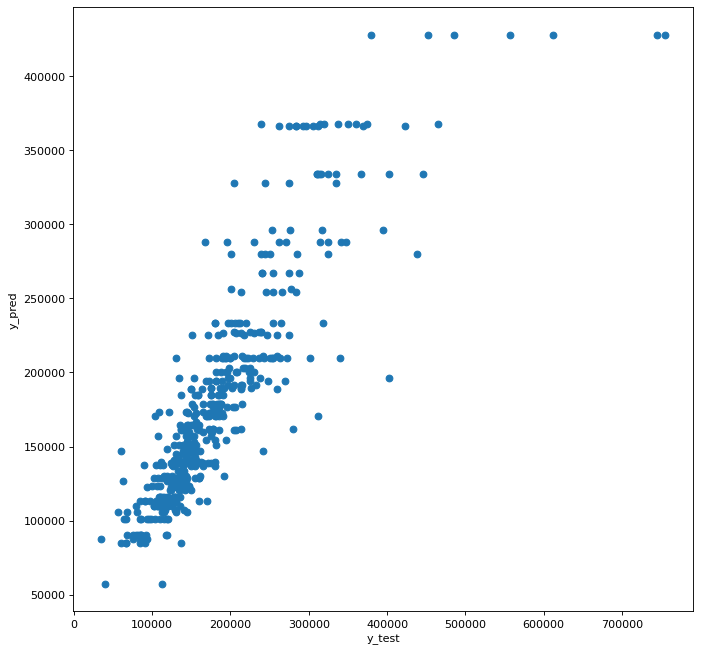

In [423]:
figure(figsize=(10, 10), dpi=80)
plt.scatter(np.array(y_test_df5), np.array(y_pred_df5))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

<hr>